# Ordering by metrics and retraining phase

## Dataset: GTSRB

## Experiment configuration 3
- Date: 27/10/2021

## Configuration
	3. Incremental guided retraining starting from the original model using only the new adversarial inputs

In [ ]:
pip install --user tensorflow==2.5

In [ ]:
tf.__version__ == '2.5.0' # Version of tensorflow

In [1]:
import argparse

import numpy as np
import tensorflow as tf
import keras.backend as K

import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.regularizers import l2

import glob
import os
import cv2
import keras


import time
import argparse

from tqdm import tqdm

from keras.models import load_model, Model


In [ ]:
cd '../utils/'

In [2]:
# utils for project
import utils_guided_retraining as utils

In [ ]:
cd '../notebooks/'

In [3]:
dataset = "gtsrb"

In [4]:
x_train,y_train = utils.get_data(dataset,"Train")
x_val,y_val = utils.get_data(dataset,"Val")
x_test,y_test = utils.get_data(dataset,"Test")

In [5]:
x_train_and_adversary,y_train_and_adversary = utils.get_data(dataset,"Train_and_adversary")

In [6]:
x_adversary_training = x_train_and_adversary[len(x_train):]
print(len(x_adversary_training))
y_adversary_training = y_train_and_adversary[len(y_train):]

print(len(y_adversary_training))

5000
5000


In [7]:
# Obtaining adversarial examples for testing 
x_test_and_adversary,y_test_and_adversary = utils.get_adversarial_data(dataset,'Test_fgsm') 

In [8]:
x_adversary_test_fgsm = x_test_and_adversary[len(x_test):]
print(len(x_adversary_test_fgsm))
y_adversary_test_fgsm = y_test_and_adversary[len(y_test):]

print(len(y_adversary_test_fgsm))

3923
3923


## ----

In [9]:
# Original model 
model_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/tf_model_25-06"


In [10]:
model_original = utils.My_model(dataset,True, model_dir)

Model loaded correctly


In [11]:
model_original.evaluate(x_test,y_test)

123/123 [==============================] - 17s 51ms/step - loss: 0.0293 - accuracy: 0.9929


[0.029302377253770828, 0.9928625822067261]

In [ ]:
model_original.evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm)

## Obtaining new LSA and DSA values 

In [12]:
# Obtaining SA values just of the adversarial inputs

lsa_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/SA_values/dsa_values_1.npy"

lsa_values = np.load(lsa_dir)[len(x_train):] 

dsa_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/SA_values/lsa_values_1.npy"

dsa_values = np.load(dsa_dir)[len(x_train):]

In [13]:
lsa_values.shape

(5000,)

In [14]:

# Obtaining top n images by LSA values
top_images_by_lsa = utils.get_x_of_indexes(list(np.flip(np.argsort(lsa_values))),x_adversary_training)
top_labels_by_lsa = utils.get_x_of_indexes(list(np.flip(np.argsort(lsa_values))),y_adversary_training)


In [15]:

top_images_by_dsa = utils.get_x_of_indexes(list(np.flip(np.argsort(dsa_values))),x_adversary_training)
top_labels_by_dsa = utils.get_x_of_indexes(list(np.flip(np.argsort(dsa_values))),y_adversary_training)


In [16]:
len(top_images_by_lsa)//20

250

In [17]:
len(top_images_by_dsa)

5000

In [18]:
m = 250
n = 0
image_sets_lsa = []
label_sets_lsa = []


for i in range(len(top_images_by_lsa)//m):
    print(i,":")
    if (i+1 >= len(top_images_by_lsa)//m):
        print("Last")
        print(0," -> ",n+m+(len(top_images_by_lsa)%m))
        top_images_by_lsa_n = np.array(top_images_by_lsa[:n+m+(len(top_images_by_lsa)%m)])
        top_labels_by_lsa_n = np.array(top_labels_by_lsa[:n+m+(len(top_images_by_lsa)%m)])
    else:
        print(0," -> ",m+n)
        top_images_by_lsa_n = np.array(top_images_by_lsa[:n+m])
        top_labels_by_lsa_n = np.array(top_labels_by_lsa[:n+m])
    image_sets_lsa.append(top_images_by_lsa_n)
    label_sets_lsa.append(top_labels_by_lsa_n)
    print(len(top_images_by_lsa_n))
    n += m



0 :
0  ->  250
250
1 :
0  ->  500
500
2 :
0  ->  750
750
3 :
0  ->  1000
1000
4 :
0  ->  1250
1250
5 :
0  ->  1500
1500
6 :
0  ->  1750
1750
7 :
0  ->  2000
2000
8 :
0  ->  2250
2250
9 :
0  ->  2500
2500
10 :
0  ->  2750
2750
11 :
0  ->  3000
3000
12 :
0  ->  3250
3250
13 :
0  ->  3500
3500
14 :
0  ->  3750
3750
15 :
0  ->  4000
4000
16 :
0  ->  4250
4250
17 :
0  ->  4500
4500
18 :
0  ->  4750
4750
19 :
Last
0  ->  5000
5000


## point lsa

In [19]:
print(model_dir)

models_lsa = []
for i in range(len(label_sets_lsa)):
    print(i,":")
    model = utils.My_model(dataset,True,model_dir)
    model.compile_model()
    models_lsa.append(model)


C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/tf_model_25-06
0 :
Model loaded correctly
Model compiled
1 :
Model loaded correctly
Model compiled
2 :
Model loaded correctly
Model compiled
3 :
Model loaded correctly
Model compiled
4 :
Model loaded correctly
Model compiled
5 :
Model loaded correctly
Model compiled
6 :
Model loaded correctly
Model compiled
7 :
Model loaded correctly
Model compiled
8 :
Model loaded correctly
Model compiled
9 :
Model loaded correctly
Model compiled
10 :
Model loaded correctly
Model compiled
11 :
Model loaded correctly
Model compiled
12 :
Model loaded correctly
Model compiled
13 :
Model loaded correctly
Model compiled
14 :
Model loaded correctly
Model compiled
15 :
Model loaded correctly
Model compiled
16 :
Model loaded correctly
Model compiled
17 :
Model loaded correctly
Model compiled
18 :
Model loaded correctly
Model compiled
19 :
Model loaded correctly
Model compiled


In [23]:
n = 0
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n=n+1

Epoch 1/10
4/4 [==============================] - 14s 2s/step - loss: 5.5069 - accuracy: 0.0373 - val_loss: 1.8878 - val_accuracy: 0.7328
Epoch 2/10
4/4 [==============================] - 7s 2s/step - loss: 3.4949 - accuracy: 0.0858 - val_loss: 1.0679 - val_accuracy: 0.8625
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 3.2527 - accuracy: 0.1261 - val_loss: 1.2638 - val_accuracy: 0.8135
Epoch 4/10
4/4 [==============================] - 8s 2s/step - loss: 3.1510 - accuracy: 0.2160 - val_loss: 0.6799 - val_accuracy: 0.9002
Epoch 5/10
4/4 [==============================] - 8s 2s/step - loss: 2.8042 - accuracy: 0.2612 - val_loss: 0.6215 - val_accuracy: 0.9176
Epoch 6/10
4/4 [==============================] - 7s 2s/step - loss: 2.4275 - accuracy: 0.3170 - val_loss: 0.5306 - val_accuracy: 0.9257
Epoch 7/10
4/4 [==============================] - 7s 2s/step - loss: 2.3385 - accuracy: 0.3513 - val_loss: 0.3154 - val_accuracy: 0.9513
Epoch 8/10
4/4 [========================

In [24]:
n=1
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

Epoch 1/10
8/8 [==============================] - 11s 1s/step - loss: 4.6635 - accuracy: 0.0821 - val_loss: 0.6325 - val_accuracy: 0.9352
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 3.0381 - accuracy: 0.2055 - val_loss: 0.3874 - val_accuracy: 0.9291
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 2.5998 - accuracy: 0.2937 - val_loss: 0.4775 - val_accuracy: 0.9125
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 2.2955 - accuracy: 0.3436 - val_loss: 0.3703 - val_accuracy: 0.9069
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 1.9737 - accuracy: 0.4636 - val_loss: 0.2930 - val_accuracy: 0.9316
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 1.8302 - accuracy: 0.4959 - val_loss: 0.5700 - val_accuracy: 0.8301
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 1.7619 - accuracy: 0.5282 - val_loss: 0.4097 - val_accuracy: 0.8882
Epoch 8/10
8/8 [=======================

In [25]:
print(n)
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

2
Epoch 1/10
12/12 [==============================] - 14s 1s/step - loss: 4.3744 - accuracy: 0.0795 - val_loss: 0.2648 - val_accuracy: 0.9689
Epoch 2/10
12/12 [==============================] - 11s 927ms/step - loss: 2.6919 - accuracy: 0.2630 - val_loss: 0.2308 - val_accuracy: 0.9431
Epoch 3/10
12/12 [==============================] - 11s 984ms/step - loss: 2.2294 - accuracy: 0.4257 - val_loss: 0.2116 - val_accuracy: 0.9451
Epoch 4/10
12/12 [==============================] - 11s 925ms/step - loss: 1.8258 - accuracy: 0.4942 - val_loss: 0.4430 - val_accuracy: 0.9074
Epoch 5/10
12/12 [==============================] - 10s 915ms/step - loss: 1.5513 - accuracy: 0.5334 - val_loss: 0.3647 - val_accuracy: 0.9084
Epoch 6/10
12/12 [==============================] - 12s 1s/step - loss: 1.3999 - accuracy: 0.6219 - val_loss: 0.3589 - val_accuracy: 0.9148
Epoch 7/10
12/12 [==============================] - 10s 890ms/step - loss: 1.2889 - accuracy: 0.6257 - val_loss: 0.4014 - val_accuracy: 0.8941
Epo

In [26]:
print(n)
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

3
Epoch 1/10
16/16 [==============================] - 14s 774ms/step - loss: 3.8351 - accuracy: 0.1359 - val_loss: 2.6199 - val_accuracy: 0.6887
Epoch 2/10
16/16 [==============================] - 12s 756ms/step - loss: 2.6239 - accuracy: 0.3381 - val_loss: 0.5953 - val_accuracy: 0.8872
Epoch 3/10
16/16 [==============================] - 12s 797ms/step - loss: 1.9538 - accuracy: 0.4642 - val_loss: 0.3608 - val_accuracy: 0.9079
Epoch 4/10
16/16 [==============================] - 12s 763ms/step - loss: 1.6868 - accuracy: 0.5264 - val_loss: 0.6117 - val_accuracy: 0.8413
Epoch 5/10
16/16 [==============================] - 12s 761ms/step - loss: 1.5700 - accuracy: 0.5581 - val_loss: 0.5861 - val_accuracy: 0.8341
Epoch 6/10
16/16 [==============================] - 13s 851ms/step - loss: 1.2894 - accuracy: 0.6163 - val_loss: 0.4818 - val_accuracy: 0.8722
Epoch 7/10
16/16 [==============================] - 12s 768ms/step - loss: 1.0944 - accuracy: 0.6719 - val_loss: 0.5481 - val_accuracy: 0.85

In [27]:
print(n) #4
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

4
Epoch 1/10
20/20 [==============================] - 20s 901ms/step - loss: 3.9175 - accuracy: 0.1464 - val_loss: 0.3362 - val_accuracy: 0.9242
Epoch 2/10
20/20 [==============================] - 15s 782ms/step - loss: 2.2183 - accuracy: 0.4050 - val_loss: 0.4456 - val_accuracy: 0.8793
Epoch 3/10
20/20 [==============================] - 14s 721ms/step - loss: 1.6717 - accuracy: 0.5586 - val_loss: 0.3765 - val_accuracy: 0.9007
Epoch 4/10
20/20 [==============================] - 13s 682ms/step - loss: 1.4210 - accuracy: 0.5903 - val_loss: 0.6646 - val_accuracy: 0.8528
Epoch 5/10
20/20 [==============================] - 13s 685ms/step - loss: 1.1816 - accuracy: 0.6560 - val_loss: 0.4437 - val_accuracy: 0.8798
Epoch 6/10
20/20 [==============================] - 13s 678ms/step - loss: 1.0894 - accuracy: 0.6816 - val_loss: 0.9266 - val_accuracy: 0.8461
Epoch 7/10
20/20 [==============================] - 13s 681ms/step - loss: 0.9826 - accuracy: 0.7174 - val_loss: 0.4949 - val_accuracy: 0.87

In [28]:
print(n)
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

5
Epoch 1/10
24/24 [==============================] - 17s 639ms/step - loss: 3.5831 - accuracy: 0.1742 - val_loss: 0.6377 - val_accuracy: 0.8428
Epoch 2/10
24/24 [==============================] - 15s 623ms/step - loss: 2.0734 - accuracy: 0.4248 - val_loss: 0.3754 - val_accuracy: 0.9038
Epoch 3/10
24/24 [==============================] - 15s 626ms/step - loss: 1.6317 - accuracy: 0.5387 - val_loss: 0.8183 - val_accuracy: 0.8188
Epoch 4/10
24/24 [==============================] - 15s 625ms/step - loss: 1.3804 - accuracy: 0.6001 - val_loss: 1.0078 - val_accuracy: 0.8007
Epoch 5/10
24/24 [==============================] - 15s 625ms/step - loss: 1.2140 - accuracy: 0.6540 - val_loss: 0.5546 - val_accuracy: 0.8400
Epoch 6/10
24/24 [==============================] - 15s 629ms/step - loss: 1.0832 - accuracy: 0.6828 - val_loss: 0.5045 - val_accuracy: 0.8686
Epoch 7/10
24/24 [==============================] - 15s 626ms/step - loss: 0.9630 - accuracy: 0.7259 - val_loss: 0.4825 - val_accuracy: 0.85

In [29]:
print(n)
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

6
Epoch 1/10
28/28 [==============================] - 18s 599ms/step - loss: 3.6114 - accuracy: 0.1782 - val_loss: 0.2712 - val_accuracy: 0.9426
Epoch 2/10
28/28 [==============================] - 16s 592ms/step - loss: 2.0096 - accuracy: 0.4491 - val_loss: 0.2889 - val_accuracy: 0.9296
Epoch 3/10
28/28 [==============================] - 17s 611ms/step - loss: 1.5402 - accuracy: 0.5680 - val_loss: 0.2986 - val_accuracy: 0.9270
Epoch 4/10
28/28 [==============================] - 17s 601ms/step - loss: 1.3069 - accuracy: 0.6342 - val_loss: 0.4019 - val_accuracy: 0.8806
Epoch 5/10
28/28 [==============================] - 16s 584ms/step - loss: 1.1021 - accuracy: 0.6774 - val_loss: 0.4568 - val_accuracy: 0.8750
Epoch 6/10
28/28 [==============================] - 17s 613ms/step - loss: 0.9449 - accuracy: 0.7082 - val_loss: 0.4193 - val_accuracy: 0.8834
Epoch 7/10
28/28 [==============================] - 17s 602ms/step - loss: 0.8230 - accuracy: 0.7459 - val_loss: 0.5524 - val_accuracy: 0.86

In [30]:
print(n)
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

7
Epoch 1/10
32/32 [==============================] - 20s 559ms/step - loss: 3.5522 - accuracy: 0.1758 - val_loss: 0.2494 - val_accuracy: 0.9510
Epoch 2/10
32/32 [==============================] - 20s 642ms/step - loss: 1.9313 - accuracy: 0.4828 - val_loss: 0.4006 - val_accuracy: 0.9099
Epoch 3/10
32/32 [==============================] - 21s 675ms/step - loss: 1.5328 - accuracy: 0.5670 - val_loss: 0.9031 - val_accuracy: 0.8546
Epoch 4/10
32/32 [==============================] - 20s 628ms/step - loss: 1.2998 - accuracy: 0.6304 - val_loss: 0.5034 - val_accuracy: 0.8691
Epoch 5/10
32/32 [==============================] - 21s 677ms/step - loss: 1.0399 - accuracy: 0.6947 - val_loss: 0.3811 - val_accuracy: 0.8987
Epoch 6/10
32/32 [==============================] - 20s 625ms/step - loss: 0.9336 - accuracy: 0.7309 - val_loss: 0.8600 - val_accuracy: 0.7959
Epoch 7/10
32/32 [==============================] - 18s 556ms/step - loss: 0.8114 - accuracy: 0.7604 - val_loss: 0.3254 - val_accuracy: 0.91

In [31]:
print(n)
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

8
Epoch 1/10
36/36 [==============================] - 21s 537ms/step - loss: 3.3550 - accuracy: 0.1955 - val_loss: 0.2637 - val_accuracy: 0.9329
Epoch 2/10
36/36 [==============================] - 19s 532ms/step - loss: 1.8027 - accuracy: 0.4994 - val_loss: 0.5209 - val_accuracy: 0.8632
Epoch 3/10
36/36 [==============================] - 19s 530ms/step - loss: 1.4917 - accuracy: 0.5803 - val_loss: 0.5402 - val_accuracy: 0.8410
Epoch 4/10
36/36 [==============================] - 19s 537ms/step - loss: 1.1321 - accuracy: 0.6743 - val_loss: 0.8409 - val_accuracy: 0.8035
Epoch 5/10
36/36 [==============================] - 19s 530ms/step - loss: 1.0347 - accuracy: 0.6894 - val_loss: 0.4713 - val_accuracy: 0.8849
Epoch 6/10
36/36 [==============================] - 19s 530ms/step - loss: 0.8605 - accuracy: 0.7399 - val_loss: 0.3901 - val_accuracy: 0.8944
Epoch 7/10
36/36 [==============================] - 19s 531ms/step - loss: 0.7403 - accuracy: 0.7730 - val_loss: 0.7533 - val_accuracy: 0.84

In [32]:
print(n)#9
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

9
Epoch 1/10
40/40 [==============================] - 23s 523ms/step - loss: 3.1776 - accuracy: 0.2229 - val_loss: 0.8105 - val_accuracy: 0.8045
Epoch 2/10
40/40 [==============================] - 20s 515ms/step - loss: 1.8561 - accuracy: 0.4900 - val_loss: 0.8068 - val_accuracy: 0.8010
Epoch 3/10
40/40 [==============================] - 20s 514ms/step - loss: 1.4262 - accuracy: 0.5866 - val_loss: 1.0849 - val_accuracy: 0.7275
Epoch 4/10
40/40 [==============================] - 21s 528ms/step - loss: 1.1136 - accuracy: 0.6731 - val_loss: 0.6155 - val_accuracy: 0.8336
Epoch 5/10
40/40 [==============================] - 21s 518ms/step - loss: 0.9356 - accuracy: 0.7205 - val_loss: 1.1364 - val_accuracy: 0.7122
Epoch 6/10
40/40 [==============================] - 21s 522ms/step - loss: 0.8683 - accuracy: 0.7479 - val_loss: 0.5123 - val_accuracy: 0.8620
Epoch 7/10
40/40 [==============================] - 21s 526ms/step - loss: 0.7173 - accuracy: 0.7822 - val_loss: 0.8163 - val_accuracy: 0.79

In [20]:
n=10
print(n)
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

10
Epoch 1/10
43/43 [==============================] - 31s 567ms/step - loss: 3.3377 - accuracy: 0.2229 - val_loss: 0.4869 - val_accuracy: 0.8775
Epoch 2/10
43/43 [==============================] - 25s 578ms/step - loss: 1.7457 - accuracy: 0.5195 - val_loss: 0.2914 - val_accuracy: 0.9257
Epoch 3/10
43/43 [==============================] - 23s 541ms/step - loss: 1.3617 - accuracy: 0.6077 - val_loss: 0.5306 - val_accuracy: 0.8678
Epoch 4/10
43/43 [==============================] - 23s 536ms/step - loss: 1.1069 - accuracy: 0.6772 - val_loss: 0.5143 - val_accuracy: 0.8533
Epoch 5/10
43/43 [==============================] - 24s 554ms/step - loss: 0.8834 - accuracy: 0.7330 - val_loss: 0.5179 - val_accuracy: 0.8563
Epoch 6/10
43/43 [==============================] - 24s 558ms/step - loss: 0.7482 - accuracy: 0.7713 - val_loss: 0.6618 - val_accuracy: 0.8387
Epoch 7/10
43/43 [==============================] - 24s 567ms/step - loss: 0.6088 - accuracy: 0.8147 - val_loss: 0.5262 - val_accuracy: 0.8

In [21]:
print(n)
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

11
Epoch 1/10
47/47 [==============================] - 27s 534ms/step - loss: 3.2659 - accuracy: 0.2122 - val_loss: 0.2722 - val_accuracy: 0.9411
Epoch 2/10
47/47 [==============================] - 25s 538ms/step - loss: 1.6274 - accuracy: 0.5331 - val_loss: 0.6497 - val_accuracy: 0.8423
Epoch 3/10
47/47 [==============================] - 25s 531ms/step - loss: 1.2354 - accuracy: 0.6403 - val_loss: 0.4557 - val_accuracy: 0.8671
Epoch 4/10
47/47 [==============================] - 25s 537ms/step - loss: 0.9467 - accuracy: 0.7157 - val_loss: 0.7293 - val_accuracy: 0.8140
Epoch 5/10
47/47 [==============================] - 25s 533ms/step - loss: 0.8361 - accuracy: 0.7559 - val_loss: 1.4970 - val_accuracy: 0.7678
Epoch 6/10
47/47 [==============================] - 26s 545ms/step - loss: 0.6829 - accuracy: 0.7960 - val_loss: 1.2414 - val_accuracy: 0.7956
Epoch 7/10
47/47 [==============================] - 25s 533ms/step - loss: 0.6583 - accuracy: 0.8099 - val_loss: 0.6445 - val_accuracy: 0.8

In [22]:
print(n)
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

12
Epoch 1/10
51/51 [==============================] - 29s 534ms/step - loss: 3.2241 - accuracy: 0.2306 - val_loss: 0.2920 - val_accuracy: 0.9191
Epoch 2/10
51/51 [==============================] - 27s 525ms/step - loss: 1.6157 - accuracy: 0.5501 - val_loss: 0.3915 - val_accuracy: 0.8964
Epoch 3/10
51/51 [==============================] - 27s 523ms/step - loss: 1.1829 - accuracy: 0.6551 - val_loss: 0.4482 - val_accuracy: 0.8714
Epoch 4/10
51/51 [==============================] - 27s 534ms/step - loss: 0.9630 - accuracy: 0.7089 - val_loss: 0.4380 - val_accuracy: 0.8854
Epoch 5/10
51/51 [==============================] - 27s 526ms/step - loss: 0.8389 - accuracy: 0.7511 - val_loss: 1.3853 - val_accuracy: 0.7913
Epoch 6/10
51/51 [==============================] - 27s 532ms/step - loss: 0.7028 - accuracy: 0.7982 - val_loss: 0.6190 - val_accuracy: 0.8392
Epoch 7/10
51/51 [==============================] - 27s 528ms/step - loss: 0.5664 - accuracy: 0.8256 - val_loss: 0.7704 - val_accuracy: 0.8

In [23]:
print(n)
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

13
Epoch 1/10
55/55 [==============================] - 32s 561ms/step - loss: 3.0156 - accuracy: 0.2665 - val_loss: 0.4400 - val_accuracy: 0.8949
Epoch 2/10
55/55 [==============================] - 26s 482ms/step - loss: 1.5227 - accuracy: 0.5734 - val_loss: 0.4081 - val_accuracy: 0.8844
Epoch 3/10
55/55 [==============================] - 26s 479ms/step - loss: 1.0820 - accuracy: 0.6754 - val_loss: 0.6279 - val_accuracy: 0.8398
Epoch 4/10
55/55 [==============================] - 27s 496ms/step - loss: 0.8419 - accuracy: 0.7478 - val_loss: 0.8136 - val_accuracy: 0.7834
Epoch 5/10
55/55 [==============================] - 27s 487ms/step - loss: 0.6896 - accuracy: 0.7865 - val_loss: 0.6239 - val_accuracy: 0.8426
Epoch 6/10
55/55 [==============================] - 27s 492ms/step - loss: 0.5997 - accuracy: 0.8175 - val_loss: 0.9368 - val_accuracy: 0.8022
Epoch 7/10
55/55 [==============================] - 27s 489ms/step - loss: 0.5422 - accuracy: 0.8425 - val_loss: 0.7752 - val_accuracy: 0.7

In [24]:
print(n)#14
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

14
Epoch 1/10
59/59 [==============================] - 35s 565ms/step - loss: 2.8399 - accuracy: 0.3024 - val_loss: 0.4662 - val_accuracy: 0.8742
Epoch 2/10
59/59 [==============================] - 34s 571ms/step - loss: 1.4274 - accuracy: 0.6024 - val_loss: 0.5390 - val_accuracy: 0.8533
Epoch 3/10
59/59 [==============================] - 32s 541ms/step - loss: 1.0957 - accuracy: 0.6798 - val_loss: 0.4719 - val_accuracy: 0.8614
Epoch 4/10
59/59 [==============================] - 30s 517ms/step - loss: 0.8593 - accuracy: 0.7510 - val_loss: 0.5552 - val_accuracy: 0.8426
Epoch 5/10
59/59 [==============================] - 33s 553ms/step - loss: 0.6803 - accuracy: 0.7943 - val_loss: 0.7476 - val_accuracy: 0.7923
Epoch 6/10
59/59 [==============================] - 31s 531ms/step - loss: 0.5822 - accuracy: 0.8214 - val_loss: 0.8247 - val_accuracy: 0.7844
Epoch 7/10
59/59 [==============================] - 30s 510ms/step - loss: 0.5263 - accuracy: 0.8370 - val_loss: 0.8219 - val_accuracy: 0.7

In [17]:
n=15
print(n)
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

15
Epoch 1/10
63/63 [==============================] - 45s 477ms/step - loss: 2.6900 - accuracy: 0.3290 - val_loss: 0.4312 - val_accuracy: 0.8880
Epoch 2/10
63/63 [==============================] - 29s 467ms/step - loss: 1.3396 - accuracy: 0.6141 - val_loss: 0.4636 - val_accuracy: 0.8699
Epoch 3/10
63/63 [==============================] - 30s 474ms/step - loss: 0.9693 - accuracy: 0.7134 - val_loss: 0.5396 - val_accuracy: 0.8472
Epoch 4/10
63/63 [==============================] - 30s 478ms/step - loss: 0.7975 - accuracy: 0.7607 - val_loss: 0.6281 - val_accuracy: 0.8553
Epoch 5/10
63/63 [==============================] - 30s 477ms/step - loss: 0.6550 - accuracy: 0.8069 - val_loss: 0.5151 - val_accuracy: 0.8574
Epoch 6/10
63/63 [==============================] - 30s 476ms/step - loss: 0.5339 - accuracy: 0.8459 - val_loss: 0.5740 - val_accuracy: 0.8538
Epoch 7/10
63/63 [==============================] - 30s 476ms/step - loss: 0.4891 - accuracy: 0.8482 - val_loss: 0.4616 - val_accuracy: 0.8

In [18]:
print(n)
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

16
Epoch 1/10
67/67 [==============================] - 33s 463ms/step - loss: 2.7622 - accuracy: 0.3196 - val_loss: 0.6525 - val_accuracy: 0.8122
Epoch 2/10
67/67 [==============================] - 30s 452ms/step - loss: 1.3844 - accuracy: 0.6025 - val_loss: 0.6272 - val_accuracy: 0.8288
Epoch 3/10
67/67 [==============================] - 30s 454ms/step - loss: 0.9351 - accuracy: 0.7258 - val_loss: 0.8555 - val_accuracy: 0.7793
Epoch 4/10
67/67 [==============================] - 30s 451ms/step - loss: 0.7510 - accuracy: 0.7752 - val_loss: 0.6740 - val_accuracy: 0.8219
Epoch 5/10
67/67 [==============================] - 30s 453ms/step - loss: 0.5837 - accuracy: 0.8195 - val_loss: 0.6722 - val_accuracy: 0.8196
Epoch 6/10
67/67 [==============================] - 32s 485ms/step - loss: 0.5004 - accuracy: 0.8553 - val_loss: 0.8822 - val_accuracy: 0.7739
Epoch 7/10
67/67 [==============================] - 31s 457ms/step - loss: 0.4140 - accuracy: 0.8768 - val_loss: 1.1524 - val_accuracy: 0.7

In [19]:
print(n)
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

17
Epoch 1/10
71/71 [==============================] - 34s 451ms/step - loss: 2.7732 - accuracy: 0.3104 - val_loss: 0.4775 - val_accuracy: 0.8839
Epoch 2/10
71/71 [==============================] - 32s 448ms/step - loss: 1.3182 - accuracy: 0.6138 - val_loss: 0.4014 - val_accuracy: 0.9056
Epoch 3/10
71/71 [==============================] - 32s 449ms/step - loss: 0.9428 - accuracy: 0.7241 - val_loss: 0.6403 - val_accuracy: 0.8576
Epoch 4/10
71/71 [==============================] - 32s 446ms/step - loss: 0.7386 - accuracy: 0.7813 - val_loss: 0.5761 - val_accuracy: 0.8421
Epoch 5/10
71/71 [==============================] - 32s 446ms/step - loss: 0.6310 - accuracy: 0.8141 - val_loss: 0.6302 - val_accuracy: 0.8221
Epoch 6/10
71/71 [==============================] - 32s 450ms/step - loss: 0.5474 - accuracy: 0.8364 - val_loss: 0.6121 - val_accuracy: 0.8484
Epoch 7/10
71/71 [==============================] - 32s 448ms/step - loss: 0.4488 - accuracy: 0.8642 - val_loss: 0.6386 - val_accuracy: 0.8

In [20]:
print(n)
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

18
Epoch 1/10
75/75 [==============================] - 35s 442ms/step - loss: 2.6945 - accuracy: 0.3490 - val_loss: 0.9348 - val_accuracy: 0.8369
Epoch 2/10
75/75 [==============================] - 32s 434ms/step - loss: 1.3036 - accuracy: 0.6447 - val_loss: 0.5291 - val_accuracy: 0.8594
Epoch 3/10
75/75 [==============================] - 33s 440ms/step - loss: 0.9344 - accuracy: 0.7339 - val_loss: 0.6382 - val_accuracy: 0.8293
Epoch 4/10
75/75 [==============================] - 33s 443ms/step - loss: 0.7347 - accuracy: 0.7903 - val_loss: 0.6565 - val_accuracy: 0.8206
Epoch 5/10
75/75 [==============================] - 33s 442ms/step - loss: 0.5901 - accuracy: 0.8158 - val_loss: 0.9149 - val_accuracy: 0.7586
Epoch 6/10
75/75 [==============================] - 33s 442ms/step - loss: 0.4522 - accuracy: 0.8618 - val_loss: 0.7927 - val_accuracy: 0.8104
Epoch 7/10
75/75 [==============================] - 33s 444ms/step - loss: 0.3995 - accuracy: 0.8829 - val_loss: 0.6927 - val_accuracy: 0.8

In [21]:
n=19
print(n)#19
models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val)
n = n+1

19
Epoch 1/10
79/79 [==============================] - 42s 454ms/step - loss: 2.4876 - accuracy: 0.3757 - val_loss: 0.4284 - val_accuracy: 0.9066
Epoch 2/10
79/79 [==============================] - 35s 446ms/step - loss: 1.1859 - accuracy: 0.6580 - val_loss: 0.6252 - val_accuracy: 0.8701
Epoch 3/10
79/79 [==============================] - 35s 448ms/step - loss: 0.8654 - accuracy: 0.7426 - val_loss: 0.4204 - val_accuracy: 0.9023
Epoch 4/10
79/79 [==============================] - 36s 453ms/step - loss: 0.7149 - accuracy: 0.7835 - val_loss: 0.6813 - val_accuracy: 0.8147
Epoch 5/10
79/79 [==============================] - 36s 456ms/step - loss: 0.5590 - accuracy: 0.8269 - val_loss: 0.6346 - val_accuracy: 0.8285
Epoch 6/10
79/79 [==============================] - 36s 458ms/step - loss: 0.4736 - accuracy: 0.8560 - val_loss: 0.5426 - val_accuracy: 0.8500
Epoch 7/10
79/79 [==============================] - 36s 453ms/step - loss: 0.4146 - accuracy: 0.8772 - val_loss: 0.6211 - val_accuracy: 0.8

In [20]:
loading = True

models_lsa = []

if loading:
    for i in range(20):
        model_lsa_dir = "D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_"+str(i)
        print(model_lsa_dir)
        model =utils.My_model('gtsrb',True,model_lsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_lsa.append(model)
       
    

D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_0
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_1
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_2
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_3
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_4
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_5
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_6
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_7
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_8
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_9
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_10
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_11
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_12
Model loaded correc

## DSA

## Point dsa

In [22]:
m = 250
n = 0
image_sets_dsa = []
label_sets_dsa = []


for i in range(len(top_images_by_dsa)//m):
    print(i,":")
    if (i+1 >= len(top_images_by_dsa)//m):
        print("Last")
        print(0," -> ",n+m+(len(top_images_by_dsa)%m))
        top_images_by_dsa_n = np.array(top_images_by_dsa[:n+m+(len(top_images_by_dsa)%m)])
        top_labels_by_dsa_n = np.array(top_labels_by_dsa[:n+m+(len(top_images_by_dsa)%m)])
    else:
        print(0," -> ",m+n)
        top_images_by_dsa_n = np.array(top_images_by_dsa[:n+m])
        top_labels_by_dsa_n = np.array(top_labels_by_dsa[:n+m])
    image_sets_dsa.append(top_images_by_dsa_n)
    label_sets_dsa.append(top_labels_by_dsa_n)
    print(len(top_images_by_dsa_n))
    n += m



0 :
0  ->  250
250
1 :
0  ->  500
500
2 :
0  ->  750
750
3 :
0  ->  1000
1000
4 :
0  ->  1250
1250
5 :
0  ->  1500
1500
6 :
0  ->  1750
1750
7 :
0  ->  2000
2000
8 :
0  ->  2250
2250
9 :
0  ->  2500
2500
10 :
0  ->  2750
2750
11 :
0  ->  3000
3000
12 :
0  ->  3250
3250
13 :
0  ->  3500
3500
14 :
0  ->  3750
3750
15 :
0  ->  4000
4000
16 :
0  ->  4250
4250
17 :
0  ->  4500
4500
18 :
0  ->  4750
4750
19 :
Last
0  ->  5000
5000


In [23]:
print(model_dir)

models_dsa = []
for i in range(len(label_sets_dsa)):
    print(i,":")
    model = utils.My_model('gtsrb',True,model_dir)
    model.compile_model()
    models_dsa.append(model)


C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/tf_model_25-06
0 :
Model loaded correctly
Model compiled
1 :
Model loaded correctly
Model compiled
2 :
Model loaded correctly
Model compiled
3 :
Model loaded correctly
Model compiled
4 :
Model loaded correctly
Model compiled
5 :
Model loaded correctly
Model compiled
6 :
Model loaded correctly
Model compiled
7 :
Model loaded correctly
Model compiled
8 :
Model loaded correctly
Model compiled
9 :
Model loaded correctly
Model compiled
10 :
Model loaded correctly
Model compiled
11 :
Model loaded correctly
Model compiled
12 :
Model loaded correctly
Model compiled
13 :
Model loaded correctly
Model compiled
14 :
Model loaded correctly
Model compiled
15 :
Model loaded correctly
Model compiled
16 :
Model loaded correctly
Model compiled
17 :
Model loaded correctly
Model compiled
18 :
Model loaded correctly
Model compiled
19 :
Model loaded correctly
Model compiled


In [19]:
models_dsa[1].evaluate(x_test,y_test)

123/123 [==============================] - 18s 52ms/step - loss: 0.0595 - accuracy: 0.9859


[0.029302377253770828, 0.9928625822067261]

In [20]:
n=0

In [21]:
n=0
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

0
Epoch 1/10
4/4 [==============================] - 14s 2s/step - loss: 6.8834 - accuracy: 0.0504 - val_loss: 2.0648 - val_accuracy: 0.6683
Epoch 2/10
4/4 [==============================] - 7s 2s/step - loss: 3.4306 - accuracy: 0.0984 - val_loss: 1.0025 - val_accuracy: 0.8329
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 3.0765 - accuracy: 0.1973 - val_loss: 0.5459 - val_accuracy: 0.8933
Epoch 4/10
4/4 [==============================] - 7s 2s/step - loss: 2.8788 - accuracy: 0.2378 - val_loss: 0.7031 - val_accuracy: 0.8385
Epoch 5/10
4/4 [==============================] - 7s 2s/step - loss: 2.8099 - accuracy: 0.2615 - val_loss: 0.5345 - val_accuracy: 0.8824
Epoch 6/10
4/4 [==============================] - 8s 3s/step - loss: 2.4950 - accuracy: 0.3706 - val_loss: 0.6959 - val_accuracy: 0.8369
Epoch 7/10
4/4 [==============================] - 8s 2s/step - loss: 2.3100 - accuracy: 0.3979 - val_loss: 0.7288 - val_accuracy: 0.8369
Epoch 8/10
4/4 [======================

In [22]:
n=1
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

1
Epoch 1/10
8/8 [==============================] - 11s 1s/step - loss: 4.1316 - accuracy: 0.0740 - val_loss: 0.5670 - val_accuracy: 0.9201
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 2.8370 - accuracy: 0.2120 - val_loss: 0.8496 - val_accuracy: 0.8660
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 2.5053 - accuracy: 0.2980 - val_loss: 0.5523 - val_accuracy: 0.9242
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 2.3730 - accuracy: 0.3280 - val_loss: 0.5642 - val_accuracy: 0.9048
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 2.0763 - accuracy: 0.4140 - val_loss: 0.4313 - val_accuracy: 0.9115
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 1.8673 - accuracy: 0.4540 - val_loss: 0.2853 - val_accuracy: 0.9308
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 1.7009 - accuracy: 0.4980 - val_loss: 0.4011 - val_accuracy: 0.8982
Epoch 8/10
8/8 [=====================

In [23]:
n=2
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

2
Epoch 1/10
12/12 [==============================] - 13s 938ms/step - loss: 4.8344 - accuracy: 0.0628 - val_loss: 0.4893 - val_accuracy: 0.9127
Epoch 2/10
12/12 [==============================] - 11s 931ms/step - loss: 2.9633 - accuracy: 0.1846 - val_loss: 0.5807 - val_accuracy: 0.9314
Epoch 3/10
12/12 [==============================] - 10s 909ms/step - loss: 2.4913 - accuracy: 0.2930 - val_loss: 0.3319 - val_accuracy: 0.9334
Epoch 4/10
12/12 [==============================] - 10s 915ms/step - loss: 1.9906 - accuracy: 0.4066 - val_loss: 0.6092 - val_accuracy: 0.8466
Epoch 5/10
12/12 [==============================] - 11s 945ms/step - loss: 1.7932 - accuracy: 0.4500 - val_loss: 0.3935 - val_accuracy: 0.8972
Epoch 6/10
12/12 [==============================] - 11s 977ms/step - loss: 1.5475 - accuracy: 0.5493 - val_loss: 0.2823 - val_accuracy: 0.9275
Epoch 7/10
12/12 [==============================] - 11s 987ms/step - loss: 1.3930 - accuracy: 0.6001 - val_loss: 0.5598 - val_accuracy: 0.87

In [24]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

3
Epoch 1/10
16/16 [==============================] - 14s 775ms/step - loss: 4.3140 - accuracy: 0.1229 - val_loss: 0.4379 - val_accuracy: 0.9166
Epoch 2/10
16/16 [==============================] - 12s 756ms/step - loss: 2.4560 - accuracy: 0.2976 - val_loss: 0.7625 - val_accuracy: 0.8451
Epoch 3/10
16/16 [==============================] - 12s 754ms/step - loss: 1.9003 - accuracy: 0.4579 - val_loss: 0.5155 - val_accuracy: 0.8678
Epoch 4/10
16/16 [==============================] - 12s 763ms/step - loss: 1.6593 - accuracy: 0.5366 - val_loss: 1.2807 - val_accuracy: 0.8066
Epoch 5/10
16/16 [==============================] - 12s 753ms/step - loss: 1.5775 - accuracy: 0.5616 - val_loss: 0.9178 - val_accuracy: 0.8104
Epoch 6/10
16/16 [==============================] - 12s 759ms/step - loss: 1.2164 - accuracy: 0.6480 - val_loss: 0.9330 - val_accuracy: 0.8209
Epoch 7/10
16/16 [==============================] - 12s 781ms/step - loss: 1.2289 - accuracy: 0.6397 - val_loss: 0.8559 - val_accuracy: 0.83

In [25]:
print(n)#4

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

4
Epoch 1/10
20/20 [==============================] - 16s 713ms/step - loss: 3.8336 - accuracy: 0.1329 - val_loss: 0.2320 - val_accuracy: 0.9314
Epoch 2/10
20/20 [==============================] - 14s 712ms/step - loss: 2.1836 - accuracy: 0.3881 - val_loss: 1.0080 - val_accuracy: 0.7844
Epoch 3/10
20/20 [==============================] - 13s 689ms/step - loss: 1.7860 - accuracy: 0.5058 - val_loss: 0.4199 - val_accuracy: 0.8714
Epoch 4/10
20/20 [==============================] - 13s 686ms/step - loss: 1.5830 - accuracy: 0.5372 - val_loss: 0.5838 - val_accuracy: 0.8479
Epoch 5/10
20/20 [==============================] - 14s 704ms/step - loss: 1.3706 - accuracy: 0.5912 - val_loss: 0.9608 - val_accuracy: 0.8237
Epoch 6/10
20/20 [==============================] - 14s 693ms/step - loss: 1.0680 - accuracy: 0.6744 - val_loss: 0.6953 - val_accuracy: 0.8543
Epoch 7/10
20/20 [==============================] - 14s 735ms/step - loss: 0.9215 - accuracy: 0.7262 - val_loss: 0.7305 - val_accuracy: 0.82

In [26]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

5
Epoch 1/10
24/24 [==============================] - 17s 641ms/step - loss: 3.8336 - accuracy: 0.1533 - val_loss: 0.2463 - val_accuracy: 0.9622
Epoch 2/10
24/24 [==============================] - 15s 630ms/step - loss: 2.1102 - accuracy: 0.3983 - val_loss: 0.6680 - val_accuracy: 0.8635
Epoch 3/10
24/24 [==============================] - 15s 628ms/step - loss: 1.7393 - accuracy: 0.4857 - val_loss: 0.5492 - val_accuracy: 0.8668
Epoch 4/10
24/24 [==============================] - 15s 649ms/step - loss: 1.5079 - accuracy: 0.5669 - val_loss: 0.5164 - val_accuracy: 0.8714
Epoch 5/10
24/24 [==============================] - 15s 630ms/step - loss: 1.2205 - accuracy: 0.6399 - val_loss: 0.4996 - val_accuracy: 0.8729
Epoch 6/10
24/24 [==============================] - 15s 638ms/step - loss: 1.1049 - accuracy: 0.6797 - val_loss: 0.3409 - val_accuracy: 0.9061
Epoch 7/10
24/24 [==============================] - 15s 644ms/step - loss: 0.9210 - accuracy: 0.7211 - val_loss: 0.5020 - val_accuracy: 0.88

In [27]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

6
Epoch 1/10
28/28 [==============================] - 19s 605ms/step - loss: 3.6123 - accuracy: 0.1654 - val_loss: 0.3762 - val_accuracy: 0.9393
Epoch 2/10
28/28 [==============================] - 16s 596ms/step - loss: 2.0638 - accuracy: 0.4242 - val_loss: 0.3737 - val_accuracy: 0.8984
Epoch 3/10
28/28 [==============================] - 17s 596ms/step - loss: 1.5791 - accuracy: 0.5612 - val_loss: 0.4829 - val_accuracy: 0.8921
Epoch 4/10
28/28 [==============================] - 17s 599ms/step - loss: 1.4039 - accuracy: 0.5735 - val_loss: 0.5562 - val_accuracy: 0.8640
Epoch 5/10
28/28 [==============================] - 17s 596ms/step - loss: 1.1846 - accuracy: 0.6565 - val_loss: 0.7544 - val_accuracy: 0.8400
Epoch 6/10
28/28 [==============================] - 17s 608ms/step - loss: 0.9515 - accuracy: 0.7210 - val_loss: 0.6873 - val_accuracy: 0.8729
Epoch 7/10
28/28 [==============================] - 17s 608ms/step - loss: 0.9061 - accuracy: 0.7230 - val_loss: 0.7293 - val_accuracy: 0.85

In [28]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

7
Epoch 1/10
32/32 [==============================] - 20s 585ms/step - loss: 3.6819 - accuracy: 0.1620 - val_loss: 0.4867 - val_accuracy: 0.9056
Epoch 2/10
32/32 [==============================] - 18s 573ms/step - loss: 1.9740 - accuracy: 0.4455 - val_loss: 0.4545 - val_accuracy: 0.8770
Epoch 3/10
32/32 [==============================] - 19s 589ms/step - loss: 1.5529 - accuracy: 0.5613 - val_loss: 0.3444 - val_accuracy: 0.9127
Epoch 4/10
32/32 [==============================] - 18s 576ms/step - loss: 1.2946 - accuracy: 0.6223 - val_loss: 0.3826 - val_accuracy: 0.9168
Epoch 5/10
32/32 [==============================] - 19s 593ms/step - loss: 1.0167 - accuracy: 0.6980 - val_loss: 0.4039 - val_accuracy: 0.9033
Epoch 6/10
32/32 [==============================] - 18s 553ms/step - loss: 0.9793 - accuracy: 0.7140 - val_loss: 0.6892 - val_accuracy: 0.8571
Epoch 7/10
32/32 [==============================] - 18s 553ms/step - loss: 0.7689 - accuracy: 0.7683 - val_loss: 1.0596 - val_accuracy: 0.84

In [29]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

8
Epoch 1/10
36/36 [==============================] - 22s 565ms/step - loss: 3.4685 - accuracy: 0.1973 - val_loss: 0.2858 - val_accuracy: 0.9372
Epoch 2/10
36/36 [==============================] - 19s 541ms/step - loss: 1.8733 - accuracy: 0.5009 - val_loss: 0.5362 - val_accuracy: 0.8865
Epoch 3/10
36/36 [==============================] - 20s 553ms/step - loss: 1.4362 - accuracy: 0.5930 - val_loss: 2.3558 - val_accuracy: 0.7627
Epoch 4/10
36/36 [==============================] - 19s 537ms/step - loss: 1.1822 - accuracy: 0.6604 - val_loss: 0.7812 - val_accuracy: 0.8556
Epoch 5/10
36/36 [==============================] - 19s 536ms/step - loss: 0.9875 - accuracy: 0.7222 - val_loss: 1.9306 - val_accuracy: 0.7591
Epoch 6/10
36/36 [==============================] - 19s 535ms/step - loss: 0.8879 - accuracy: 0.7444 - val_loss: 1.4700 - val_accuracy: 0.8262
Epoch 7/10
36/36 [==============================] - 19s 538ms/step - loss: 0.7358 - accuracy: 0.7862 - val_loss: 0.5251 - val_accuracy: 0.86

In [30]:
print(n)#9

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

9
Epoch 1/10
40/40 [==============================] - 23s 526ms/step - loss: 3.3106 - accuracy: 0.2221 - val_loss: 0.1420 - val_accuracy: 0.9696
Epoch 2/10
40/40 [==============================] - 21s 523ms/step - loss: 1.8297 - accuracy: 0.4989 - val_loss: 0.3869 - val_accuracy: 0.8974
Epoch 3/10
40/40 [==============================] - 21s 529ms/step - loss: 1.3918 - accuracy: 0.6120 - val_loss: 0.7352 - val_accuracy: 0.8007
Epoch 4/10
40/40 [==============================] - 21s 520ms/step - loss: 1.1075 - accuracy: 0.6782 - val_loss: 0.6144 - val_accuracy: 0.8791
Epoch 5/10
40/40 [==============================] - 20s 514ms/step - loss: 0.9432 - accuracy: 0.7210 - val_loss: 1.5862 - val_accuracy: 0.7719
Epoch 6/10
40/40 [==============================] - 21s 519ms/step - loss: 0.8195 - accuracy: 0.7644 - val_loss: 0.4584 - val_accuracy: 0.8755
Epoch 7/10
40/40 [==============================] - 22s 554ms/step - loss: 0.7014 - accuracy: 0.7777 - val_loss: 0.6808 - val_accuracy: 0.79

In [20]:
n=10
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

10
Epoch 1/10
43/43 [==============================] - 29s 533ms/step - loss: 3.0077 - accuracy: 0.2607 - val_loss: 0.2583 - val_accuracy: 0.9436
Epoch 2/10
43/43 [==============================] - 22s 524ms/step - loss: 1.7527 - accuracy: 0.5189 - val_loss: 0.4135 - val_accuracy: 0.9010
Epoch 3/10
43/43 [==============================] - 22s 520ms/step - loss: 1.3009 - accuracy: 0.6239 - val_loss: 0.4981 - val_accuracy: 0.8643
Epoch 4/10
43/43 [==============================] - 23s 533ms/step - loss: 1.0344 - accuracy: 0.6917 - val_loss: 1.2542 - val_accuracy: 0.8204
Epoch 5/10
43/43 [==============================] - 23s 537ms/step - loss: 0.8761 - accuracy: 0.7254 - val_loss: 0.6390 - val_accuracy: 0.8336
Epoch 6/10
43/43 [==============================] - 23s 531ms/step - loss: 0.7405 - accuracy: 0.7853 - val_loss: 0.4250 - val_accuracy: 0.8870
Epoch 7/10
43/43 [==============================] - 23s 539ms/step - loss: 0.5664 - accuracy: 0.8231 - val_loss: 0.4406 - val_accuracy: 0.8

In [21]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

11
Epoch 1/10
47/47 [==============================] - 27s 536ms/step - loss: 3.0344 - accuracy: 0.2677 - val_loss: 0.4954 - val_accuracy: 0.8898
Epoch 2/10
47/47 [==============================] - 25s 542ms/step - loss: 1.6072 - accuracy: 0.5546 - val_loss: 0.3222 - val_accuracy: 0.9163
Epoch 3/10
47/47 [==============================] - 31s 661ms/step - loss: 1.2180 - accuracy: 0.6376 - val_loss: 0.3883 - val_accuracy: 0.8977
Epoch 4/10
47/47 [==============================] - 29s 612ms/step - loss: 0.9159 - accuracy: 0.7225 - val_loss: 0.3973 - val_accuracy: 0.8801
Epoch 5/10
47/47 [==============================] - 26s 556ms/step - loss: 0.8011 - accuracy: 0.7574 - val_loss: 0.3182 - val_accuracy: 0.9178
Epoch 6/10
47/47 [==============================] - 28s 592ms/step - loss: 0.6638 - accuracy: 0.8047 - val_loss: 0.4974 - val_accuracy: 0.8783
Epoch 7/10
47/47 [==============================] - 26s 566ms/step - loss: 0.5308 - accuracy: 0.8409 - val_loss: 0.6450 - val_accuracy: 0.8

In [22]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

12
Epoch 1/10
51/51 [==============================] - 29s 532ms/step - loss: 3.0037 - accuracy: 0.2813 - val_loss: 0.7902 - val_accuracy: 0.8313
Epoch 2/10
51/51 [==============================] - 26s 521ms/step - loss: 1.5715 - accuracy: 0.5540 - val_loss: 0.8352 - val_accuracy: 0.8349
Epoch 3/10
51/51 [==============================] - 30s 588ms/step - loss: 1.1112 - accuracy: 0.6671 - val_loss: 0.6362 - val_accuracy: 0.8255
Epoch 4/10
51/51 [==============================] - 27s 541ms/step - loss: 0.9139 - accuracy: 0.7160 - val_loss: 0.7039 - val_accuracy: 0.7994
Epoch 5/10
51/51 [==============================] - 26s 521ms/step - loss: 0.7724 - accuracy: 0.7733 - val_loss: 0.6159 - val_accuracy: 0.8265
Epoch 6/10
51/51 [==============================] - 27s 535ms/step - loss: 0.6000 - accuracy: 0.8146 - val_loss: 0.6136 - val_accuracy: 0.8375
Epoch 7/10
51/51 [==============================] - 29s 561ms/step - loss: 0.5998 - accuracy: 0.8149 - val_loss: 0.6071 - val_accuracy: 0.8

In [23]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

13
Epoch 1/10
55/55 [==============================] - 30s 505ms/step - loss: 3.1008 - accuracy: 0.2672 - val_loss: 0.5199 - val_accuracy: 0.8793
Epoch 2/10
55/55 [==============================] - 28s 502ms/step - loss: 1.4519 - accuracy: 0.5901 - val_loss: 0.3790 - val_accuracy: 0.8951
Epoch 3/10
55/55 [==============================] - 27s 499ms/step - loss: 1.1203 - accuracy: 0.6661 - val_loss: 0.4896 - val_accuracy: 0.8614
Epoch 4/10
55/55 [==============================] - 27s 498ms/step - loss: 0.8284 - accuracy: 0.7521 - val_loss: 0.5974 - val_accuracy: 0.8589
Epoch 5/10
55/55 [==============================] - 27s 500ms/step - loss: 0.7416 - accuracy: 0.7780 - val_loss: 0.4570 - val_accuracy: 0.8709
Epoch 6/10
55/55 [==============================] - 27s 498ms/step - loss: 0.6190 - accuracy: 0.8079 - val_loss: 0.5953 - val_accuracy: 0.8500
Epoch 7/10
55/55 [==============================] - 28s 506ms/step - loss: 0.5389 - accuracy: 0.8425 - val_loss: 0.3305 - val_accuracy: 0.9

In [24]:
print(n)#14

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

14
Epoch 1/10
59/59 [==============================] - 33s 516ms/step - loss: 2.8417 - accuracy: 0.3061 - val_loss: 0.3419 - val_accuracy: 0.9260
Epoch 2/10
59/59 [==============================] - 29s 491ms/step - loss: 1.5044 - accuracy: 0.5688 - val_loss: 0.4535 - val_accuracy: 0.8928
Epoch 3/10
59/59 [==============================] - 29s 489ms/step - loss: 1.0672 - accuracy: 0.6822 - val_loss: 0.3625 - val_accuracy: 0.9041
Epoch 4/10
59/59 [==============================] - 29s 490ms/step - loss: 0.8517 - accuracy: 0.7556 - val_loss: 0.3937 - val_accuracy: 0.8918
Epoch 5/10
59/59 [==============================] - 29s 493ms/step - loss: 0.7135 - accuracy: 0.7798 - val_loss: 1.0469 - val_accuracy: 0.8043
Epoch 6/10
59/59 [==============================] - 29s 490ms/step - loss: 0.6282 - accuracy: 0.8208 - val_loss: 1.6044 - val_accuracy: 0.7844
Epoch 7/10
59/59 [==============================] - 29s 494ms/step - loss: 0.5066 - accuracy: 0.8521 - val_loss: 0.6338 - val_accuracy: 0.8

In [19]:
n=15
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

15
Epoch 1/10
63/63 [==============================] - 44s 458ms/step - loss: 2.8134 - accuracy: 0.3025 - val_loss: 0.3903 - val_accuracy: 0.9331
Epoch 2/10
63/63 [==============================] - 28s 448ms/step - loss: 1.4192 - accuracy: 0.5945 - val_loss: 0.5010 - val_accuracy: 0.8742
Epoch 3/10
63/63 [==============================] - 29s 457ms/step - loss: 1.0145 - accuracy: 0.7084 - val_loss: 0.5376 - val_accuracy: 0.8574
Epoch 4/10
63/63 [==============================] - 29s 457ms/step - loss: 0.8378 - accuracy: 0.7545 - val_loss: 0.4849 - val_accuracy: 0.8686
Epoch 5/10
63/63 [==============================] - 29s 460ms/step - loss: 0.6587 - accuracy: 0.8040 - val_loss: 1.4991 - val_accuracy: 0.8104
Epoch 6/10
63/63 [==============================] - 29s 459ms/step - loss: 0.6225 - accuracy: 0.8186 - val_loss: 0.6301 - val_accuracy: 0.8303
Epoch 7/10
63/63 [==============================] - 29s 458ms/step - loss: 0.5251 - accuracy: 0.8515 - val_loss: 0.5755 - val_accuracy: 0.8

In [20]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

16
Epoch 1/10
67/67 [==============================] - 33s 461ms/step - loss: 2.8929 - accuracy: 0.3070 - val_loss: 0.5687 - val_accuracy: 0.8648
Epoch 2/10
67/67 [==============================] - 30s 450ms/step - loss: 1.3241 - accuracy: 0.6264 - val_loss: 0.4658 - val_accuracy: 0.8880
Epoch 3/10
67/67 [==============================] - 30s 450ms/step - loss: 1.0333 - accuracy: 0.7006 - val_loss: 0.6349 - val_accuracy: 0.8278
Epoch 4/10
67/67 [==============================] - 30s 451ms/step - loss: 0.7866 - accuracy: 0.7609 - val_loss: 1.1662 - val_accuracy: 0.7938
Epoch 5/10
67/67 [==============================] - 30s 449ms/step - loss: 0.6628 - accuracy: 0.7920 - val_loss: 0.7090 - val_accuracy: 0.8247
Epoch 6/10
67/67 [==============================] - 30s 451ms/step - loss: 0.5643 - accuracy: 0.8350 - val_loss: 0.9036 - val_accuracy: 0.7448
Epoch 7/10
67/67 [==============================] - 30s 450ms/step - loss: 0.4700 - accuracy: 0.8677 - val_loss: 1.3542 - val_accuracy: 0.7

In [21]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

17
Epoch 1/10
71/71 [==============================] - 34s 452ms/step - loss: 2.6848 - accuracy: 0.3411 - val_loss: 0.4503 - val_accuracy: 0.8867
Epoch 2/10
71/71 [==============================] - 32s 447ms/step - loss: 1.2906 - accuracy: 0.6251 - val_loss: 0.5258 - val_accuracy: 0.8645
Epoch 3/10
71/71 [==============================] - 32s 445ms/step - loss: 0.9100 - accuracy: 0.7296 - val_loss: 0.7185 - val_accuracy: 0.7969
Epoch 4/10
71/71 [==============================] - 32s 446ms/step - loss: 0.7298 - accuracy: 0.7807 - val_loss: 0.5850 - val_accuracy: 0.8466
Epoch 5/10
71/71 [==============================] - 32s 454ms/step - loss: 0.5779 - accuracy: 0.8248 - val_loss: 0.7398 - val_accuracy: 0.8040
Epoch 6/10
71/71 [==============================] - 34s 474ms/step - loss: 0.5011 - accuracy: 0.8509 - val_loss: 0.7589 - val_accuracy: 0.8007
Epoch 7/10
71/71 [==============================] - 33s 462ms/step - loss: 0.4483 - accuracy: 0.8693 - val_loss: 0.8440 - val_accuracy: 0.8

In [22]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

18
Epoch 1/10
75/75 [==============================] - 37s 475ms/step - loss: 2.5439 - accuracy: 0.3755 - val_loss: 0.3034 - val_accuracy: 0.9115
Epoch 2/10
75/75 [==============================] - 37s 501ms/step - loss: 1.3427 - accuracy: 0.6197 - val_loss: 0.5672 - val_accuracy: 0.8443
Epoch 3/10
75/75 [==============================] - 36s 486ms/step - loss: 0.9345 - accuracy: 0.7351 - val_loss: 0.7621 - val_accuracy: 0.8038
Epoch 4/10
75/75 [==============================] - 36s 484ms/step - loss: 0.7088 - accuracy: 0.7901 - val_loss: 0.7061 - val_accuracy: 0.8199
Epoch 5/10
75/75 [==============================] - 36s 484ms/step - loss: 0.5742 - accuracy: 0.8305 - val_loss: 0.9832 - val_accuracy: 0.8091
Epoch 6/10
75/75 [==============================] - 36s 483ms/step - loss: 0.4813 - accuracy: 0.8650 - val_loss: 1.3160 - val_accuracy: 0.7341
Epoch 7/10
75/75 [==============================] - 36s 484ms/step - loss: 0.3962 - accuracy: 0.8883 - val_loss: 0.5895 - val_accuracy: 0.8

In [24]:
n=19
print(n)#19

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val)
n = n+1

19
Epoch 1/10
79/79 [==============================] - 38s 458ms/step - loss: 2.6989 - accuracy: 0.3412 - val_loss: 0.5777 - val_accuracy: 0.8347
Epoch 2/10
79/79 [==============================] - 37s 465ms/step - loss: 1.2180 - accuracy: 0.6465 - val_loss: 0.5242 - val_accuracy: 0.8530
Epoch 3/10
79/79 [==============================] - 36s 458ms/step - loss: 0.8724 - accuracy: 0.7499 - val_loss: 0.4298 - val_accuracy: 0.8762
Epoch 4/10
79/79 [==============================] - 36s 460ms/step - loss: 0.7259 - accuracy: 0.7914 - val_loss: 0.7776 - val_accuracy: 0.7857
Epoch 5/10
79/79 [==============================] - 38s 488ms/step - loss: 0.5620 - accuracy: 0.8345 - val_loss: 0.9105 - val_accuracy: 0.8191
Epoch 6/10
79/79 [==============================] - 36s 461ms/step - loss: 0.5255 - accuracy: 0.8404 - val_loss: 0.7091 - val_accuracy: 0.8104
Epoch 7/10
79/79 [==============================] - 36s 456ms/step - loss: 0.4220 - accuracy: 0.8819 - val_loss: 0.7887 - val_accuracy: 0.8

In [21]:
loading = True

models_dsa = []

if loading:
    for i in range(20):
        model_dsa_dir = "D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_"+str(i)
        print(model_dsa_dir)
        model =utils.My_model('gtsrb',True,model_dsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_dsa.append(model)
       
    

D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_0
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_1
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_2
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_3
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_4
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_5
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_6
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_7
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_8
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_9
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_10
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_11
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_12
Model loaded correc

## Random

## point random

In [11]:
import random
random_indexes =list(range(len(x_adversary_training)))
random.shuffle(random_indexes)
print(random_indexes[:10])
print(len(random_indexes))

[3017, 846, 3968, 2921, 3561, 2089, 2624, 1354, 2880, 4528]
5000


In [11]:
save_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/SA_values/random_values_2_5000.npy"

#np.save(save_dir,np.array(random_indexes))
random_indexes = np.load(save_dir)

In [12]:
random_indexes

array([2999, 2311, 3460, ..., 2733,  249, 4598])

In [13]:
# Obtaining top n images by random values
top_images_by_random = utils.get_x_of_indexes(list(np.flip(np.argsort(random_indexes))),x_adversary_training)
top_labels_by_random = utils.get_x_of_indexes(list(np.flip(np.argsort(random_indexes))),y_adversary_training)

In [14]:
m = 250
n = 0
image_sets_random = []
label_sets_random = []


for i in range(len(top_images_by_random)//m):
    print(i,":")
    if (i+1 >= len(top_images_by_random)//m):
        print("Last")
        print(0," -> ",n+m+(len(top_images_by_random)%m))
        top_images_by_random_n = np.array(top_images_by_random[:n+m+(len(top_images_by_random)%m)])
        top_labels_by_random_n = np.array(top_labels_by_random[:n+m+(len(top_images_by_random)%m)])
    else:
        print(0," -> ",m+n)
        top_images_by_random_n = np.array(top_images_by_random[:n+m])
        top_labels_by_random_n = np.array(top_labels_by_random[:n+m])
    image_sets_random.append(top_images_by_random_n)
    label_sets_random.append(top_labels_by_random_n)
    print(len(top_images_by_random_n))
    n += m



0 :
0  ->  250
250
1 :
0  ->  500
500
2 :
0  ->  750
750
3 :
0  ->  1000
1000
4 :
0  ->  1250
1250
5 :
0  ->  1500
1500
6 :
0  ->  1750
1750
7 :
0  ->  2000
2000
8 :
0  ->  2250
2250
9 :
0  ->  2500
2500
10 :
0  ->  2750
2750
11 :
0  ->  3000
3000
12 :
0  ->  3250
3250
13 :
0  ->  3500
3500
14 :
0  ->  3750
3750
15 :
0  ->  4000
4000
16 :
0  ->  4250
4250
17 :
0  ->  4500
4500
18 :
0  ->  4750
4750
19 :
Last
0  ->  5000
5000


In [15]:
print(model_dir)

models_random = []
for i in range(len(label_sets_random)):
    print(i,":")
    model = utils.My_model('gtsrb',True,model_dir)
    model.compile_model()
    models_random.append(model)


C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/tf_model_25-06
0 :
Model loaded correctly
Model compiled
1 :
Model loaded correctly
Model compiled
2 :
Model loaded correctly
Model compiled
3 :
Model loaded correctly
Model compiled
4 :
Model loaded correctly
Model compiled
5 :
Model loaded correctly
Model compiled
6 :
Model loaded correctly
Model compiled
7 :
Model loaded correctly
Model compiled
8 :
Model loaded correctly
Model compiled
9 :
Model loaded correctly
Model compiled
10 :
Model loaded correctly
Model compiled
11 :
Model loaded correctly
Model compiled
12 :
Model loaded correctly
Model compiled
13 :
Model loaded correctly
Model compiled
14 :
Model loaded correctly
Model compiled
15 :
Model loaded correctly
Model compiled
16 :
Model loaded correctly
Model compiled
17 :
Model loaded correctly
Model compiled
18 :
Model loaded correctly
Model compiled
19 :
Model loaded correctly
Model compiled


In [17]:
n=0
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

0
Epoch 1/10
4/4 [==============================] - 23s 2s/step - loss: 4.8658 - accuracy: 0.1184 - val_loss: 0.2392 - val_accuracy: 0.9735
Epoch 2/10
4/4 [==============================] - 7s 2s/step - loss: 2.8337 - accuracy: 0.2941 - val_loss: 0.1702 - val_accuracy: 0.9727
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 2.3852 - accuracy: 0.3178 - val_loss: 0.2419 - val_accuracy: 0.9617
Epoch 4/10
4/4 [==============================] - 7s 2s/step - loss: 2.1758 - accuracy: 0.4163 - val_loss: 0.1320 - val_accuracy: 0.9742
Epoch 5/10
4/4 [==============================] - 7s 2s/step - loss: 1.8567 - accuracy: 0.4503 - val_loss: 0.3572 - val_accuracy: 0.9265
Epoch 6/10
4/4 [==============================] - 7s 2s/step - loss: 1.7275 - accuracy: 0.5058 - val_loss: 0.2402 - val_accuracy: 0.9490
Epoch 7/10
4/4 [==============================] - 7s 2s/step - loss: 1.6289 - accuracy: 0.5507 - val_loss: 0.2466 - val_accuracy: 0.9426
Epoch 8/10
4/4 [======================

In [18]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

1
Epoch 1/10
8/8 [==============================] - 11s 1s/step - loss: 4.0697 - accuracy: 0.1386 - val_loss: 0.3167 - val_accuracy: 0.9538
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 2.4782 - accuracy: 0.3458 - val_loss: 0.3798 - val_accuracy: 0.9303
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 2.1088 - accuracy: 0.4228 - val_loss: 0.5530 - val_accuracy: 0.8951
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 1.8484 - accuracy: 0.4938 - val_loss: 0.3741 - val_accuracy: 0.9234
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 1.5771 - accuracy: 0.5597 - val_loss: 0.4846 - val_accuracy: 0.9023
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 1.4025 - accuracy: 0.6010 - val_loss: 0.2937 - val_accuracy: 0.9382
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 1.2252 - accuracy: 0.6443 - val_loss: 0.5651 - val_accuracy: 0.8765
Epoch 8/10
8/8 [======================

In [19]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

2
Epoch 1/10
12/12 [==============================] - 13s 986ms/step - loss: 3.8011 - accuracy: 0.1609 - val_loss: 0.3490 - val_accuracy: 0.9523
Epoch 2/10
12/12 [==============================] - 10s 909ms/step - loss: 2.3880 - accuracy: 0.3375 - val_loss: 0.2143 - val_accuracy: 0.9592
Epoch 3/10
12/12 [==============================] - 10s 895ms/step - loss: 1.8372 - accuracy: 0.4949 - val_loss: 0.2657 - val_accuracy: 0.9462
Epoch 4/10
12/12 [==============================] - 10s 891ms/step - loss: 1.6456 - accuracy: 0.5339 - val_loss: 0.5162 - val_accuracy: 0.8597
Epoch 5/10
12/12 [==============================] - 10s 889ms/step - loss: 1.3781 - accuracy: 0.6022 - val_loss: 0.3750 - val_accuracy: 0.9013
Epoch 6/10
12/12 [==============================] - 10s 897ms/step - loss: 1.2612 - accuracy: 0.6502 - val_loss: 0.2155 - val_accuracy: 0.9418
Epoch 7/10
12/12 [==============================] - 10s 914ms/step - loss: 1.1619 - accuracy: 0.6829 - val_loss: 0.5135 - val_accuracy: 0.86

In [20]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

3
Epoch 1/10
16/16 [==============================] - 14s 768ms/step - loss: 3.6259 - accuracy: 0.1905 - val_loss: 0.2278 - val_accuracy: 0.9449
Epoch 2/10
16/16 [==============================] - 12s 751ms/step - loss: 2.0647 - accuracy: 0.4301 - val_loss: 0.3782 - val_accuracy: 0.9176
Epoch 3/10
16/16 [==============================] - 12s 750ms/step - loss: 1.6381 - accuracy: 0.5340 - val_loss: 0.7526 - val_accuracy: 0.8515
Epoch 4/10
16/16 [==============================] - 12s 752ms/step - loss: 1.4909 - accuracy: 0.5824 - val_loss: 0.3109 - val_accuracy: 0.9161
Epoch 5/10
16/16 [==============================] - 12s 752ms/step - loss: 1.2808 - accuracy: 0.6144 - val_loss: 0.3531 - val_accuracy: 0.8959
Epoch 6/10
16/16 [==============================] - 12s 753ms/step - loss: 1.0668 - accuracy: 0.6929 - val_loss: 0.4047 - val_accuracy: 0.8941
Epoch 7/10
16/16 [==============================] - 12s 774ms/step - loss: 0.9403 - accuracy: 0.7018 - val_loss: 0.3514 - val_accuracy: 0.91

In [21]:
print(n)#4

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

4
Epoch 1/10
20/20 [==============================] - 15s 691ms/step - loss: 3.5390 - accuracy: 0.1981 - val_loss: 0.4337 - val_accuracy: 0.9428
Epoch 2/10
20/20 [==============================] - 13s 679ms/step - loss: 2.0474 - accuracy: 0.4392 - val_loss: 0.4498 - val_accuracy: 0.9046
Epoch 3/10
20/20 [==============================] - 13s 678ms/step - loss: 1.5602 - accuracy: 0.5530 - val_loss: 0.6694 - val_accuracy: 0.8295
Epoch 4/10
20/20 [==============================] - 13s 681ms/step - loss: 1.3801 - accuracy: 0.6122 - val_loss: 1.1631 - val_accuracy: 0.7954
Epoch 5/10
20/20 [==============================] - 13s 684ms/step - loss: 1.2687 - accuracy: 0.6330 - val_loss: 0.5820 - val_accuracy: 0.8413
Epoch 6/10
20/20 [==============================] - 13s 689ms/step - loss: 0.9525 - accuracy: 0.7289 - val_loss: 0.9204 - val_accuracy: 0.7992
Epoch 7/10
20/20 [==============================] - 13s 681ms/step - loss: 0.8887 - accuracy: 0.7653 - val_loss: 0.7623 - val_accuracy: 0.81

In [22]:
n=5
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

5
Epoch 1/10
24/24 [==============================] - 17s 639ms/step - loss: 3.4109 - accuracy: 0.2232 - val_loss: 0.7360 - val_accuracy: 0.8318
Epoch 2/10
24/24 [==============================] - 15s 643ms/step - loss: 1.9596 - accuracy: 0.4613 - val_loss: 0.7285 - val_accuracy: 0.8160
Epoch 3/10
24/24 [==============================] - 15s 624ms/step - loss: 1.4723 - accuracy: 0.5943 - val_loss: 0.5777 - val_accuracy: 0.8520
Epoch 4/10
24/24 [==============================] - 15s 630ms/step - loss: 1.2924 - accuracy: 0.6297 - val_loss: 0.5024 - val_accuracy: 0.8678
Epoch 5/10
24/24 [==============================] - 15s 627ms/step - loss: 1.0746 - accuracy: 0.6890 - val_loss: 0.4667 - val_accuracy: 0.8717
Epoch 6/10
24/24 [==============================] - 15s 626ms/step - loss: 0.9690 - accuracy: 0.7184 - val_loss: 0.7154 - val_accuracy: 0.8500
Epoch 7/10
24/24 [==============================] - 15s 625ms/step - loss: 0.8780 - accuracy: 0.7345 - val_loss: 0.7853 - val_accuracy: 0.79

In [23]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

6
Epoch 1/10
28/28 [==============================] - 19s 595ms/step - loss: 3.3484 - accuracy: 0.2026 - val_loss: 0.7051 - val_accuracy: 0.8604
Epoch 2/10
28/28 [==============================] - 17s 597ms/step - loss: 1.9659 - accuracy: 0.4641 - val_loss: 0.6435 - val_accuracy: 0.8882
Epoch 3/10
28/28 [==============================] - 16s 590ms/step - loss: 1.5507 - accuracy: 0.5756 - val_loss: 0.4650 - val_accuracy: 0.8752
Epoch 4/10
28/28 [==============================] - 16s 590ms/step - loss: 1.2778 - accuracy: 0.6203 - val_loss: 0.7615 - val_accuracy: 0.8051
Epoch 5/10
28/28 [==============================] - 16s 592ms/step - loss: 1.1216 - accuracy: 0.6612 - val_loss: 0.4439 - val_accuracy: 0.8732
Epoch 6/10
28/28 [==============================] - 16s 591ms/step - loss: 1.0026 - accuracy: 0.7099 - val_loss: 0.4964 - val_accuracy: 0.8576
Epoch 7/10
28/28 [==============================] - 17s 601ms/step - loss: 0.7898 - accuracy: 0.7698 - val_loss: 0.5641 - val_accuracy: 0.84

In [24]:
n=7
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

7
Epoch 1/10
32/32 [==============================] - 20s 553ms/step - loss: 3.2201 - accuracy: 0.2363 - val_loss: 0.6273 - val_accuracy: 0.8599
Epoch 2/10
32/32 [==============================] - 17s 539ms/step - loss: 1.8061 - accuracy: 0.4737 - val_loss: 1.1705 - val_accuracy: 0.7719
Epoch 3/10
32/32 [==============================] - 18s 557ms/step - loss: 1.5373 - accuracy: 0.5575 - val_loss: 0.7516 - val_accuracy: 0.8035
Epoch 4/10
32/32 [==============================] - 17s 544ms/step - loss: 1.2627 - accuracy: 0.6486 - val_loss: 1.1456 - val_accuracy: 0.7015
Epoch 5/10
32/32 [==============================] - 17s 541ms/step - loss: 1.1068 - accuracy: 0.6693 - val_loss: 0.6024 - val_accuracy: 0.8290
Epoch 6/10
32/32 [==============================] - 17s 545ms/step - loss: 0.8644 - accuracy: 0.7466 - val_loss: 0.8442 - val_accuracy: 0.8339
Epoch 7/10
32/32 [==============================] - 17s 541ms/step - loss: 0.7773 - accuracy: 0.7637 - val_loss: 0.5705 - val_accuracy: 0.83

In [25]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

8
Epoch 1/10
36/36 [==============================] - 21s 527ms/step - loss: 3.0975 - accuracy: 0.2684 - val_loss: 0.2335 - val_accuracy: 0.9594
Epoch 2/10
36/36 [==============================] - 19s 526ms/step - loss: 1.7245 - accuracy: 0.5278 - val_loss: 0.6850 - val_accuracy: 0.8492
Epoch 3/10
36/36 [==============================] - 19s 526ms/step - loss: 1.4529 - accuracy: 0.5804 - val_loss: 0.4167 - val_accuracy: 0.8992
Epoch 4/10
36/36 [==============================] - 19s 519ms/step - loss: 1.0962 - accuracy: 0.6714 - val_loss: 1.9279 - val_accuracy: 0.7999
Epoch 5/10
36/36 [==============================] - 19s 519ms/step - loss: 1.1118 - accuracy: 0.6899 - val_loss: 0.5738 - val_accuracy: 0.8579
Epoch 6/10
36/36 [==============================] - 19s 534ms/step - loss: 0.8819 - accuracy: 0.7495 - val_loss: 0.4449 - val_accuracy: 0.8933
Epoch 7/10
36/36 [==============================] - 19s 526ms/step - loss: 0.7319 - accuracy: 0.7912 - val_loss: 1.1128 - val_accuracy: 0.84

In [26]:
n=9
print(n)#9

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

9
Epoch 1/10
40/40 [==============================] - 22s 510ms/step - loss: 3.1293 - accuracy: 0.2480 - val_loss: 0.7645 - val_accuracy: 0.8224
Epoch 2/10
40/40 [==============================] - 21s 529ms/step - loss: 1.8088 - accuracy: 0.5043 - val_loss: 0.3297 - val_accuracy: 0.9064
Epoch 3/10
40/40 [==============================] - 20s 504ms/step - loss: 1.2619 - accuracy: 0.6266 - val_loss: 0.7184 - val_accuracy: 0.8196
Epoch 4/10
40/40 [==============================] - 20s 503ms/step - loss: 1.0838 - accuracy: 0.6900 - val_loss: 1.3912 - val_accuracy: 0.6463
Epoch 5/10
40/40 [==============================] - 20s 508ms/step - loss: 1.1064 - accuracy: 0.6939 - val_loss: 0.4477 - val_accuracy: 0.8701
Epoch 6/10
40/40 [==============================] - 20s 504ms/step - loss: 0.7208 - accuracy: 0.7908 - val_loss: 2.1939 - val_accuracy: 0.4269
Epoch 7/10
40/40 [==============================] - 20s 504ms/step - loss: 1.0132 - accuracy: 0.7130 - val_loss: 0.5733 - val_accuracy: 0.86

In [27]:
n=10
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

10
Epoch 1/10
43/43 [==============================] - 24s 512ms/step - loss: 3.1170 - accuracy: 0.2614 - val_loss: 0.6468 - val_accuracy: 0.8581
Epoch 2/10
43/43 [==============================] - 21s 501ms/step - loss: 1.5579 - accuracy: 0.5479 - val_loss: 0.6308 - val_accuracy: 0.8459
Epoch 3/10
43/43 [==============================] - 22s 503ms/step - loss: 1.1739 - accuracy: 0.6597 - val_loss: 0.6567 - val_accuracy: 0.8244
Epoch 4/10
43/43 [==============================] - 22s 503ms/step - loss: 0.9632 - accuracy: 0.7225 - val_loss: 0.9366 - val_accuracy: 0.7823
Epoch 5/10
43/43 [==============================] - 21s 500ms/step - loss: 0.8238 - accuracy: 0.7597 - val_loss: 0.7152 - val_accuracy: 0.8043
Epoch 6/10
43/43 [==============================] - 21s 501ms/step - loss: 0.6621 - accuracy: 0.8017 - val_loss: 0.7251 - val_accuracy: 0.8091
Epoch 7/10
43/43 [==============================] - 22s 504ms/step - loss: 0.5507 - accuracy: 0.8370 - val_loss: 0.9600 - val_accuracy: 0.7

In [28]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

11
Epoch 1/10
47/47 [==============================] - 25s 497ms/step - loss: 2.8337 - accuracy: 0.3000 - val_loss: 0.4730 - val_accuracy: 0.8813
Epoch 2/10
47/47 [==============================] - 23s 498ms/step - loss: 1.4169 - accuracy: 0.6085 - val_loss: 0.7717 - val_accuracy: 0.8546
Epoch 3/10
47/47 [==============================] - 23s 492ms/step - loss: 1.1528 - accuracy: 0.6707 - val_loss: 0.5866 - val_accuracy: 0.8474
Epoch 4/10
47/47 [==============================] - 23s 490ms/step - loss: 0.8881 - accuracy: 0.7255 - val_loss: 0.5930 - val_accuracy: 0.8380
Epoch 5/10
47/47 [==============================] - 23s 498ms/step - loss: 0.7553 - accuracy: 0.7802 - val_loss: 0.6966 - val_accuracy: 0.8181
Epoch 6/10
47/47 [==============================] - 23s 492ms/step - loss: 0.6155 - accuracy: 0.8045 - val_loss: 0.6713 - val_accuracy: 0.8117
Epoch 7/10
47/47 [==============================] - 23s 492ms/step - loss: 0.5496 - accuracy: 0.8349 - val_loss: 1.0893 - val_accuracy: 0.7

In [29]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

12
Epoch 1/10
51/51 [==============================] - 26s 485ms/step - loss: 2.8591 - accuracy: 0.2775 - val_loss: 0.4353 - val_accuracy: 0.9046
Epoch 2/10
51/51 [==============================] - 25s 490ms/step - loss: 1.4739 - accuracy: 0.5888 - val_loss: 0.3896 - val_accuracy: 0.8979
Epoch 3/10
51/51 [==============================] - 25s 489ms/step - loss: 1.0809 - accuracy: 0.6814 - val_loss: 0.6051 - val_accuracy: 0.8290
Epoch 4/10
51/51 [==============================] - 24s 481ms/step - loss: 0.9487 - accuracy: 0.7175 - val_loss: 0.5827 - val_accuracy: 0.8382
Epoch 5/10
51/51 [==============================] - 25s 494ms/step - loss: 0.7500 - accuracy: 0.7726 - val_loss: 0.6523 - val_accuracy: 0.8405
Epoch 6/10
51/51 [==============================] - 24s 480ms/step - loss: 0.6294 - accuracy: 0.8089 - val_loss: 0.5402 - val_accuracy: 0.8421
Epoch 7/10
51/51 [==============================] - 25s 482ms/step - loss: 0.5177 - accuracy: 0.8454 - val_loss: 0.6845 - val_accuracy: 0.8

In [30]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

13
Epoch 1/10
55/55 [==============================] - 28s 476ms/step - loss: 2.8063 - accuracy: 0.3054 - val_loss: 0.4414 - val_accuracy: 0.8936
Epoch 2/10
55/55 [==============================] - 26s 473ms/step - loss: 1.3924 - accuracy: 0.5908 - val_loss: 0.3398 - val_accuracy: 0.9125
Epoch 3/10
55/55 [==============================] - 27s 489ms/step - loss: 1.0493 - accuracy: 0.6930 - val_loss: 0.3359 - val_accuracy: 0.9048
Epoch 4/10
55/55 [==============================] - 27s 493ms/step - loss: 0.8445 - accuracy: 0.7523 - val_loss: 0.4055 - val_accuracy: 0.8895
Epoch 5/10
55/55 [==============================] - 26s 475ms/step - loss: 0.6867 - accuracy: 0.7871 - val_loss: 0.4537 - val_accuracy: 0.8893
Epoch 6/10
55/55 [==============================] - 26s 476ms/step - loss: 0.5713 - accuracy: 0.8305 - val_loss: 0.2873 - val_accuracy: 0.9240
Epoch 7/10
55/55 [==============================] - 26s 473ms/step - loss: 0.5297 - accuracy: 0.8457 - val_loss: 0.9290 - val_accuracy: 0.8

In [31]:
print(n)#14

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

14
Epoch 1/10
59/59 [==============================] - 30s 472ms/step - loss: 2.8527 - accuracy: 0.3138 - val_loss: 0.3713 - val_accuracy: 0.9005
Epoch 2/10
59/59 [==============================] - 27s 464ms/step - loss: 1.4231 - accuracy: 0.5982 - val_loss: 0.3847 - val_accuracy: 0.9002
Epoch 3/10
59/59 [==============================] - 28s 471ms/step - loss: 1.0606 - accuracy: 0.6921 - val_loss: 0.7946 - val_accuracy: 0.8377
Epoch 4/10
59/59 [==============================] - 27s 464ms/step - loss: 0.8742 - accuracy: 0.7424 - val_loss: 0.4969 - val_accuracy: 0.8665
Epoch 5/10
59/59 [==============================] - 27s 466ms/step - loss: 0.7121 - accuracy: 0.7970 - val_loss: 0.6401 - val_accuracy: 0.8456
Epoch 6/10
59/59 [==============================] - 27s 464ms/step - loss: 0.5857 - accuracy: 0.8262 - val_loss: 1.2207 - val_accuracy: 0.7946
Epoch 7/10
59/59 [==============================] - 27s 465ms/step - loss: 0.4971 - accuracy: 0.8503 - val_loss: 0.5635 - val_accuracy: 0.8

In [18]:
n=15
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

15
Epoch 1/10
63/63 [==============================] - 45s 461ms/step - loss: 2.8212 - accuracy: 0.3045 - val_loss: 0.4604 - val_accuracy: 0.8806
Epoch 2/10
63/63 [==============================] - 28s 452ms/step - loss: 1.3605 - accuracy: 0.6056 - val_loss: 0.5621 - val_accuracy: 0.8382
Epoch 3/10
63/63 [==============================] - 29s 455ms/step - loss: 0.9990 - accuracy: 0.7130 - val_loss: 0.9154 - val_accuracy: 0.7895
Epoch 4/10
63/63 [==============================] - 29s 455ms/step - loss: 0.7548 - accuracy: 0.7714 - val_loss: 0.7002 - val_accuracy: 0.8117
Epoch 5/10
63/63 [==============================] - 29s 457ms/step - loss: 0.6759 - accuracy: 0.8011 - val_loss: 0.6481 - val_accuracy: 0.8283
Epoch 6/10
63/63 [==============================] - 29s 465ms/step - loss: 0.5513 - accuracy: 0.8326 - val_loss: 0.5486 - val_accuracy: 0.8505
Epoch 7/10
63/63 [==============================] - 30s 479ms/step - loss: 0.4634 - accuracy: 0.8582 - val_loss: 0.5209 - val_accuracy: 0.8

In [19]:
n=16
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

16
Epoch 1/10
67/67 [==============================] - 34s 483ms/step - loss: 2.6276 - accuracy: 0.3454 - val_loss: 0.4044 - val_accuracy: 0.8956
Epoch 2/10
67/67 [==============================] - 31s 466ms/step - loss: 1.3118 - accuracy: 0.6273 - val_loss: 0.5499 - val_accuracy: 0.8581
Epoch 3/10
67/67 [==============================] - 30s 450ms/step - loss: 0.9420 - accuracy: 0.7207 - val_loss: 0.6055 - val_accuracy: 0.8380
Epoch 4/10
67/67 [==============================] - 30s 448ms/step - loss: 0.7616 - accuracy: 0.7713 - val_loss: 0.8570 - val_accuracy: 0.7974
Epoch 5/10
67/67 [==============================] - 30s 449ms/step - loss: 0.6090 - accuracy: 0.8155 - val_loss: 0.9564 - val_accuracy: 0.7798
Epoch 6/10
67/67 [==============================] - 30s 455ms/step - loss: 0.5079 - accuracy: 0.8551 - val_loss: 0.7328 - val_accuracy: 0.8096
Epoch 7/10
67/67 [==============================] - 30s 450ms/step - loss: 0.4380 - accuracy: 0.8618 - val_loss: 0.7703 - val_accuracy: 0.8

In [20]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

17
Epoch 1/10
71/71 [==============================] - 34s 451ms/step - loss: 2.7248 - accuracy: 0.3228 - val_loss: 0.5965 - val_accuracy: 0.8459
Epoch 2/10
71/71 [==============================] - 32s 458ms/step - loss: 1.2695 - accuracy: 0.6288 - val_loss: 0.4049 - val_accuracy: 0.9109
Epoch 3/10
71/71 [==============================] - 32s 447ms/step - loss: 0.9580 - accuracy: 0.7266 - val_loss: 0.9174 - val_accuracy: 0.8278
Epoch 4/10
71/71 [==============================] - 31s 444ms/step - loss: 0.7806 - accuracy: 0.7668 - val_loss: 0.6536 - val_accuracy: 0.8502
Epoch 5/10
71/71 [==============================] - 33s 462ms/step - loss: 0.5882 - accuracy: 0.8203 - val_loss: 0.4798 - val_accuracy: 0.8770
Epoch 6/10
71/71 [==============================] - 31s 443ms/step - loss: 0.4632 - accuracy: 0.8600 - val_loss: 0.9578 - val_accuracy: 0.8237
Epoch 7/10
71/71 [==============================] - 34s 475ms/step - loss: 0.4212 - accuracy: 0.8693 - val_loss: 1.3161 - val_accuracy: 0.7

In [21]:
n=18
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

18
Epoch 1/10
75/75 [==============================] - 37s 471ms/step - loss: 2.5869 - accuracy: 0.3629 - val_loss: 0.5671 - val_accuracy: 0.8579
Epoch 2/10
75/75 [==============================] - 35s 473ms/step - loss: 1.2574 - accuracy: 0.6437 - val_loss: 1.3193 - val_accuracy: 0.7816
Epoch 3/10
75/75 [==============================] - 37s 498ms/step - loss: 0.9199 - accuracy: 0.7278 - val_loss: 0.6264 - val_accuracy: 0.8477
Epoch 4/10
75/75 [==============================] - 37s 492ms/step - loss: 0.6967 - accuracy: 0.7933 - val_loss: 3.3877 - val_accuracy: 0.6805
Epoch 5/10
75/75 [==============================] - 37s 494ms/step - loss: 0.6203 - accuracy: 0.8204 - val_loss: 0.5902 - val_accuracy: 0.8285
Epoch 6/10
75/75 [==============================] - 35s 468ms/step - loss: 0.4700 - accuracy: 0.8641 - val_loss: 1.2811 - val_accuracy: 0.7900
Epoch 7/10
75/75 [==============================] - 36s 485ms/step - loss: 0.3943 - accuracy: 0.8796 - val_loss: 0.5348 - val_accuracy: 0.8

In [16]:
n=19
print(n)#19

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val)
n = n+1

19
Epoch 1/10
79/79 [==============================] - 90s 571ms/step - loss: 2.5786 - accuracy: 0.3412 - val_loss: 0.7239 - val_accuracy: 0.8382
Epoch 2/10
79/79 [==============================] - 45s 570ms/step - loss: 1.2260 - accuracy: 0.6476 - val_loss: 1.1359 - val_accuracy: 0.8025
Epoch 3/10
79/79 [==============================] - 46s 578ms/step - loss: 0.9079 - accuracy: 0.7339 - val_loss: 0.6723 - val_accuracy: 0.8150
Epoch 4/10
79/79 [==============================] - 47s 590ms/step - loss: 0.6540 - accuracy: 0.7984 - val_loss: 0.4377 - val_accuracy: 0.8793
Epoch 5/10
79/79 [==============================] - 45s 574ms/step - loss: 0.5761 - accuracy: 0.8313 - val_loss: 1.1302 - val_accuracy: 0.7737
Epoch 6/10
79/79 [==============================] - 45s 573ms/step - loss: 0.4966 - accuracy: 0.8594 - val_loss: 0.8834 - val_accuracy: 0.7948
Epoch 7/10
79/79 [==============================] - 45s 564ms/step - loss: 0.4111 - accuracy: 0.8733 - val_loss: 0.8379 - val_accuracy: 0.7

In [22]:
loading = True

models_random = []

if loading:
    for i in range(20):
        model_random_dir = "D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_"+str(i)
        print(model_random_dir)
        model =utils.My_model('gtsrb',True,model_random_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_random.append(model)
       

D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_0
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_1
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_2
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_3
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_4
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_5
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_6
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_7
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_8
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_9
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_10
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_11
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_

## NC

## point nc

In [17]:
# NC
nc_values = []
for i in range(1,38):
    save_dir_rand = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/NC_values/nc_values_"+str(i)+".npy"
    #print(save_dir_rand)
    tmp_values = np.load(save_dir_rand)
    #print(tmp_values.shape)
    nc_values = np.append(nc_values,tmp_values)

In [18]:
nc_values.shape

(36366,)

In [19]:
nc_values_adversarial = nc_values[len(x_train):]
nc_values_adversarial.shape

(5000,)

In [20]:

top_images_by_nc = utils.get_x_of_indexes(list(np.flip(np.argsort(nc_values_adversarial))),x_adversary_training)
top_labels_by_nc = utils.get_x_of_indexes(list(np.flip(np.argsort(nc_values_adversarial))),y_adversary_training)


In [21]:
m = 250
n = 0
image_sets_nc = []
label_sets_nc = []


for i in range(len(top_images_by_nc)//m):
    print(i,":")
    if (i+1 >= len(top_images_by_nc)//m):
        print("Last")
        print(0," -> ",n+m+(len(top_images_by_nc)%m))
        top_images_by_nc_n = np.array(top_images_by_nc[:n+m+(len(top_images_by_nc)%m)])
        top_labels_by_nc_n = np.array(top_labels_by_nc[:n+m+(len(top_images_by_nc)%m)])
    else:
        print(0," -> ",m+n)
        top_images_by_nc_n = np.array(top_images_by_nc[:n+m])
        top_labels_by_nc_n = np.array(top_labels_by_nc[:n+m])
    image_sets_nc.append(top_images_by_nc_n)
    label_sets_nc.append(top_labels_by_nc_n)
    print(len(top_images_by_nc_n))
    n += m



0 :
0  ->  250
250
1 :
0  ->  500
500
2 :
0  ->  750
750
3 :
0  ->  1000
1000
4 :
0  ->  1250
1250
5 :
0  ->  1500
1500
6 :
0  ->  1750
1750
7 :
0  ->  2000
2000
8 :
0  ->  2250
2250
9 :
0  ->  2500
2500
10 :
0  ->  2750
2750
11 :
0  ->  3000
3000
12 :
0  ->  3250
3250
13 :
0  ->  3500
3500
14 :
0  ->  3750
3750
15 :
0  ->  4000
4000
16 :
0  ->  4250
4250
17 :
0  ->  4500
4500
18 :
0  ->  4750
4750
19 :
Last
0  ->  5000
5000


In [22]:
print(model_dir)

models_nc = []
for i in range(len(label_sets_nc)):
    print(i,":")
    model = utils.My_model('gtsrb',True,model_dir)
    model.compile_model()
    models_nc.append(model)


C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/tf_model_25-06
0 :
Model loaded correctly
Model compiled
1 :
Model loaded correctly
Model compiled
2 :
Model loaded correctly
Model compiled
3 :
Model loaded correctly
Model compiled
4 :
Model loaded correctly
Model compiled
5 :
Model loaded correctly
Model compiled
6 :
Model loaded correctly
Model compiled
7 :
Model loaded correctly
Model compiled
8 :
Model loaded correctly
Model compiled
9 :
Model loaded correctly
Model compiled
10 :
Model loaded correctly
Model compiled
11 :
Model loaded correctly
Model compiled
12 :
Model loaded correctly
Model compiled
13 :
Model loaded correctly
Model compiled
14 :
Model loaded correctly
Model compiled
15 :
Model loaded correctly
Model compiled
16 :
Model loaded correctly
Model compiled
17 :
Model loaded correctly
Model compiled
18 :
Model loaded correctly
Model compiled
19 :
Model loaded correctly
Model compiled


In [17]:
n=0
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

0
Epoch 1/10
4/4 [==============================] - 23s 2s/step - loss: 7.7773 - accuracy: 0.1656 - val_loss: 1.5795 - val_accuracy: 0.7321
Epoch 2/10
4/4 [==============================] - 7s 2s/step - loss: 2.7674 - accuracy: 0.2410 - val_loss: 1.2464 - val_accuracy: 0.7747
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 2.6087 - accuracy: 0.2919 - val_loss: 0.9143 - val_accuracy: 0.7974
Epoch 4/10
4/4 [==============================] - 7s 2s/step - loss: 2.3021 - accuracy: 0.3357 - val_loss: 0.6994 - val_accuracy: 0.8709
Epoch 5/10
4/4 [==============================] - 7s 2s/step - loss: 2.1792 - accuracy: 0.3781 - val_loss: 0.9254 - val_accuracy: 0.8137
Epoch 6/10
4/4 [==============================] - 7s 2s/step - loss: 2.3245 - accuracy: 0.3690 - val_loss: 0.8908 - val_accuracy: 0.8285
Epoch 7/10
4/4 [==============================] - 7s 2s/step - loss: 1.9720 - accuracy: 0.4232 - val_loss: 0.5651 - val_accuracy: 0.9020
Epoch 8/10
4/4 [======================

In [18]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

1
Epoch 1/10
8/8 [==============================] - 11s 1s/step - loss: 5.0118 - accuracy: 0.1634 - val_loss: 0.9989 - val_accuracy: 0.8158
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 2.5601 - accuracy: 0.2782 - val_loss: 0.6951 - val_accuracy: 0.8681
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 2.2094 - accuracy: 0.3735 - val_loss: 0.8348 - val_accuracy: 0.8206
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 2.1412 - accuracy: 0.3497 - val_loss: 0.9045 - val_accuracy: 0.7844
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 2.0132 - accuracy: 0.4182 - val_loss: 0.4619 - val_accuracy: 0.8956
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 1.8499 - accuracy: 0.4851 - val_loss: 0.6067 - val_accuracy: 0.8505
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 1.7732 - accuracy: 0.4766 - val_loss: 0.8536 - val_accuracy: 0.7851
Epoch 8/10
8/8 [======================

In [19]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

2
Epoch 1/10
12/12 [==============================] - 12s 928ms/step - loss: 5.1305 - accuracy: 0.1163 - val_loss: 0.7686 - val_accuracy: 0.8729
Epoch 2/10
12/12 [==============================] - 10s 910ms/step - loss: 2.5467 - accuracy: 0.2691 - val_loss: 0.6593 - val_accuracy: 0.8591
Epoch 3/10
12/12 [==============================] - 10s 913ms/step - loss: 2.3767 - accuracy: 0.3364 - val_loss: 0.6044 - val_accuracy: 0.8793
Epoch 4/10
12/12 [==============================] - 10s 905ms/step - loss: 1.9560 - accuracy: 0.4298 - val_loss: 3.2494 - val_accuracy: 0.6764
Epoch 5/10
12/12 [==============================] - 10s 908ms/step - loss: 2.9963 - accuracy: 0.3720 - val_loss: 0.4170 - val_accuracy: 0.9066
Epoch 6/10
12/12 [==============================] - 10s 906ms/step - loss: 1.7902 - accuracy: 0.4875 - val_loss: 0.3588 - val_accuracy: 0.9018
Epoch 7/10
12/12 [==============================] - 11s 925ms/step - loss: 1.5140 - accuracy: 0.5485 - val_loss: 0.7674 - val_accuracy: 0.80

In [20]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

3
Epoch 1/10
16/16 [==============================] - 14s 802ms/step - loss: 3.8587 - accuracy: 0.1880 - val_loss: 0.5428 - val_accuracy: 0.9028
Epoch 2/10
16/16 [==============================] - 13s 805ms/step - loss: 2.2605 - accuracy: 0.3643 - val_loss: 0.7672 - val_accuracy: 0.8398
Epoch 3/10
16/16 [==============================] - 12s 755ms/step - loss: 1.9314 - accuracy: 0.4295 - val_loss: 0.6002 - val_accuracy: 0.8676
Epoch 4/10
16/16 [==============================] - 12s 744ms/step - loss: 1.6672 - accuracy: 0.5161 - val_loss: 0.5177 - val_accuracy: 0.8732
Epoch 5/10
16/16 [==============================] - 12s 742ms/step - loss: 1.5675 - accuracy: 0.5612 - val_loss: 0.5372 - val_accuracy: 0.8495
Epoch 6/10
16/16 [==============================] - 11s 740ms/step - loss: 1.3011 - accuracy: 0.6472 - val_loss: 0.4785 - val_accuracy: 0.8734
Epoch 7/10
16/16 [==============================] - 11s 740ms/step - loss: 1.1348 - accuracy: 0.6647 - val_loss: 1.2555 - val_accuracy: 0.77

In [21]:
#4
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

4
Epoch 1/10
20/20 [==============================] - 15s 675ms/step - loss: 3.7553 - accuracy: 0.2270 - val_loss: 0.7026 - val_accuracy: 0.8686
Epoch 2/10
20/20 [==============================] - 13s 665ms/step - loss: 2.1776 - accuracy: 0.3696 - val_loss: 0.6010 - val_accuracy: 0.8579
Epoch 3/10
20/20 [==============================] - 13s 664ms/step - loss: 1.8461 - accuracy: 0.4584 - val_loss: 0.7841 - val_accuracy: 0.8015
Epoch 4/10
20/20 [==============================] - 13s 662ms/step - loss: 1.5677 - accuracy: 0.5372 - val_loss: 0.3777 - val_accuracy: 0.9122
Epoch 5/10
20/20 [==============================] - 13s 663ms/step - loss: 1.4052 - accuracy: 0.6098 - val_loss: 0.5999 - val_accuracy: 0.8334
Epoch 6/10
20/20 [==============================] - 13s 663ms/step - loss: 1.2742 - accuracy: 0.6256 - val_loss: 0.5886 - val_accuracy: 0.8449
Epoch 7/10
20/20 [==============================] - 13s 663ms/step - loss: 1.0179 - accuracy: 0.7036 - val_loss: 0.6889 - val_accuracy: 0.80

In [23]:
n=5
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

5
Epoch 1/10
24/24 [==============================] - 17s 627ms/step - loss: 3.5933 - accuracy: 0.1950 - val_loss: 0.5620 - val_accuracy: 0.8806
Epoch 2/10
24/24 [==============================] - 14s 590ms/step - loss: 2.0479 - accuracy: 0.4001 - val_loss: 0.8122 - val_accuracy: 0.8191
Epoch 3/10
24/24 [==============================] - 14s 589ms/step - loss: 1.7060 - accuracy: 0.5021 - val_loss: 0.6836 - val_accuracy: 0.8199
Epoch 4/10
24/24 [==============================] - 15s 619ms/step - loss: 1.4469 - accuracy: 0.5805 - val_loss: 0.5839 - val_accuracy: 0.8431
Epoch 5/10
24/24 [==============================] - 16s 665ms/step - loss: 1.2351 - accuracy: 0.6268 - val_loss: 0.4509 - val_accuracy: 0.8762
Epoch 6/10
24/24 [==============================] - 17s 711ms/step - loss: 1.0558 - accuracy: 0.6929 - val_loss: 0.7645 - val_accuracy: 0.7999
Epoch 7/10
24/24 [==============================] - 15s 632ms/step - loss: 0.9573 - accuracy: 0.7232 - val_loss: 0.6828 - val_accuracy: 0.82

In [24]:
n=6
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

6
Epoch 1/10
28/28 [==============================] - 18s 594ms/step - loss: 3.5022 - accuracy: 0.2123 - val_loss: 0.2627 - val_accuracy: 0.9768
Epoch 2/10
28/28 [==============================] - 16s 575ms/step - loss: 1.9404 - accuracy: 0.4365 - val_loss: 0.5827 - val_accuracy: 0.9043
Epoch 3/10
28/28 [==============================] - 16s 578ms/step - loss: 1.5592 - accuracy: 0.5468 - val_loss: 0.5134 - val_accuracy: 0.8796
Epoch 4/10
28/28 [==============================] - 16s 579ms/step - loss: 1.2770 - accuracy: 0.6273 - val_loss: 0.3517 - val_accuracy: 0.8997
Epoch 5/10
28/28 [==============================] - 16s 576ms/step - loss: 1.0954 - accuracy: 0.6775 - val_loss: 0.4358 - val_accuracy: 0.8900
Epoch 6/10
28/28 [==============================] - 16s 577ms/step - loss: 0.9305 - accuracy: 0.7296 - val_loss: 0.4405 - val_accuracy: 0.8773
Epoch 7/10
28/28 [==============================] - 16s 576ms/step - loss: 0.7902 - accuracy: 0.7674 - val_loss: 0.4040 - val_accuracy: 0.89

In [25]:
n=7
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

7
Epoch 1/10
32/32 [==============================] - 20s 561ms/step - loss: 3.0945 - accuracy: 0.2601 - val_loss: 1.2746 - val_accuracy: 0.8012
Epoch 2/10
32/32 [==============================] - 17s 548ms/step - loss: 1.8039 - accuracy: 0.4957 - val_loss: 0.4662 - val_accuracy: 0.8770
Epoch 3/10
32/32 [==============================] - 17s 550ms/step - loss: 1.3455 - accuracy: 0.6224 - val_loss: 0.3880 - val_accuracy: 0.9020
Epoch 4/10
32/32 [==============================] - 17s 547ms/step - loss: 1.1514 - accuracy: 0.6705 - val_loss: 0.3946 - val_accuracy: 0.9020
Epoch 5/10
32/32 [==============================] - 17s 547ms/step - loss: 0.9535 - accuracy: 0.7112 - val_loss: 0.3288 - val_accuracy: 0.9112
Epoch 6/10
32/32 [==============================] - 18s 555ms/step - loss: 0.9060 - accuracy: 0.7558 - val_loss: 0.4342 - val_accuracy: 0.9002
Epoch 7/10
32/32 [==============================] - 17s 547ms/step - loss: 0.7666 - accuracy: 0.7864 - val_loss: 0.4215 - val_accuracy: 0.87

In [26]:
n=8
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

8
Epoch 1/10
36/36 [==============================] - 22s 553ms/step - loss: 3.5727 - accuracy: 0.1972 - val_loss: 2.6159 - val_accuracy: 0.6836
Epoch 2/10
36/36 [==============================] - 19s 527ms/step - loss: 2.2978 - accuracy: 0.4608 - val_loss: 0.7466 - val_accuracy: 0.7844
Epoch 3/10
36/36 [==============================] - 19s 526ms/step - loss: 1.4411 - accuracy: 0.5875 - val_loss: 0.3987 - val_accuracy: 0.8936
Epoch 4/10
36/36 [==============================] - 19s 532ms/step - loss: 1.1082 - accuracy: 0.6773 - val_loss: 0.2696 - val_accuracy: 0.9260
Epoch 5/10
36/36 [==============================] - 19s 538ms/step - loss: 0.9572 - accuracy: 0.7138 - val_loss: 0.5377 - val_accuracy: 0.8742
Epoch 6/10
36/36 [==============================] - 19s 527ms/step - loss: 0.8754 - accuracy: 0.7437 - val_loss: 0.3549 - val_accuracy: 0.9015
Epoch 7/10
36/36 [==============================] - 19s 544ms/step - loss: 0.7290 - accuracy: 0.7923 - val_loss: 0.7362 - val_accuracy: 0.79

In [28]:
print(n)#9

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

9
Epoch 1/10
40/40 [==============================] - 24s 560ms/step - loss: 3.2981 - accuracy: 0.2603 - val_loss: 0.3026 - val_accuracy: 0.9268
Epoch 2/10
40/40 [==============================] - 21s 538ms/step - loss: 1.6529 - accuracy: 0.5271 - val_loss: 0.4609 - val_accuracy: 0.8750
Epoch 3/10
40/40 [==============================] - 21s 533ms/step - loss: 1.2664 - accuracy: 0.6272 - val_loss: 0.7768 - val_accuracy: 0.7874
Epoch 4/10
40/40 [==============================] - 22s 546ms/step - loss: 1.0851 - accuracy: 0.6862 - val_loss: 0.4994 - val_accuracy: 0.8683
Epoch 5/10
40/40 [==============================] - 23s 576ms/step - loss: 0.8958 - accuracy: 0.7486 - val_loss: 2.5307 - val_accuracy: 0.6571
Epoch 6/10
40/40 [==============================] - 21s 533ms/step - loss: 0.8081 - accuracy: 0.7733 - val_loss: 0.7835 - val_accuracy: 0.8354
Epoch 7/10
40/40 [==============================] - 21s 531ms/step - loss: 0.6456 - accuracy: 0.8204 - val_loss: 0.7307 - val_accuracy: 0.79

In [18]:
n=10
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

10
Epoch 1/10
43/43 [==============================] - 30s 529ms/step - loss: 3.0823 - accuracy: 0.2802 - val_loss: 0.3910 - val_accuracy: 0.9061
Epoch 2/10
43/43 [==============================] - 22s 514ms/step - loss: 1.5796 - accuracy: 0.5548 - val_loss: 0.4840 - val_accuracy: 0.8765
Epoch 3/10
43/43 [==============================] - 24s 567ms/step - loss: 1.2308 - accuracy: 0.6628 - val_loss: 0.5949 - val_accuracy: 0.8398
Epoch 4/10
43/43 [==============================] - 24s 554ms/step - loss: 1.0425 - accuracy: 0.7126 - val_loss: 0.5658 - val_accuracy: 0.8492
Epoch 5/10
43/43 [==============================] - 22s 506ms/step - loss: 0.8549 - accuracy: 0.7355 - val_loss: 0.5068 - val_accuracy: 0.8607
Epoch 6/10
43/43 [==============================] - 22s 504ms/step - loss: 0.6727 - accuracy: 0.8044 - val_loss: 0.5852 - val_accuracy: 0.8492
Epoch 7/10
43/43 [==============================] - 22s 503ms/step - loss: 0.6237 - accuracy: 0.8119 - val_loss: 0.5255 - val_accuracy: 0.8

In [19]:
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

11
Epoch 1/10
47/47 [==============================] - 25s 495ms/step - loss: 2.7629 - accuracy: 0.3239 - val_loss: 0.2872 - val_accuracy: 0.9548
Epoch 2/10
47/47 [==============================] - 23s 491ms/step - loss: 1.4545 - accuracy: 0.5878 - val_loss: 0.4197 - val_accuracy: 0.8987
Epoch 3/10
47/47 [==============================] - 23s 489ms/step - loss: 1.1114 - accuracy: 0.6859 - val_loss: 0.5079 - val_accuracy: 0.8678
Epoch 4/10
47/47 [==============================] - 23s 490ms/step - loss: 0.8852 - accuracy: 0.7317 - val_loss: 0.3380 - val_accuracy: 0.9109
Epoch 5/10
47/47 [==============================] - 24s 518ms/step - loss: 0.7236 - accuracy: 0.7820 - val_loss: 0.6142 - val_accuracy: 0.8584
Epoch 6/10
47/47 [==============================] - 24s 514ms/step - loss: 0.5886 - accuracy: 0.8287 - val_loss: 1.5268 - val_accuracy: 0.7612
Epoch 7/10
47/47 [==============================] - 24s 504ms/step - loss: 0.5079 - accuracy: 0.8458 - val_loss: 0.4863 - val_accuracy: 0.8

In [20]:
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

12
Epoch 1/10
51/51 [==============================] - 26s 485ms/step - loss: 3.0094 - accuracy: 0.2763 - val_loss: 0.3112 - val_accuracy: 0.9166
Epoch 2/10
51/51 [==============================] - 25s 488ms/step - loss: 1.4135 - accuracy: 0.5809 - val_loss: 0.4238 - val_accuracy: 0.8862
Epoch 3/10
51/51 [==============================] - 27s 539ms/step - loss: 1.0712 - accuracy: 0.6928 - val_loss: 0.5221 - val_accuracy: 0.8620
Epoch 4/10
51/51 [==============================] - 25s 495ms/step - loss: 0.9120 - accuracy: 0.7428 - val_loss: 0.6483 - val_accuracy: 0.8295
Epoch 5/10
51/51 [==============================] - 25s 501ms/step - loss: 0.7312 - accuracy: 0.7834 - val_loss: 0.9779 - val_accuracy: 0.8038
Epoch 6/10
51/51 [==============================] - 25s 484ms/step - loss: 0.5953 - accuracy: 0.8250 - val_loss: 0.9319 - val_accuracy: 0.8270
Epoch 7/10
51/51 [==============================] - 24s 478ms/step - loss: 0.4807 - accuracy: 0.8602 - val_loss: 0.6690 - val_accuracy: 0.8

In [21]:
n=13
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

13
Epoch 1/10
55/55 [==============================] - 33s 550ms/step - loss: 2.9872 - accuracy: 0.2894 - val_loss: 0.3487 - val_accuracy: 0.9268
Epoch 2/10
55/55 [==============================] - 29s 522ms/step - loss: 1.4183 - accuracy: 0.5904 - val_loss: 0.5331 - val_accuracy: 0.8849
Epoch 3/10
55/55 [==============================] - 27s 484ms/step - loss: 1.0488 - accuracy: 0.7009 - val_loss: 0.5845 - val_accuracy: 0.8459
Epoch 4/10
55/55 [==============================] - 27s 484ms/step - loss: 0.8299 - accuracy: 0.7555 - val_loss: 1.0934 - val_accuracy: 0.8214
Epoch 5/10
55/55 [==============================] - 27s 490ms/step - loss: 0.6909 - accuracy: 0.8025 - val_loss: 0.5561 - val_accuracy: 0.8502
Epoch 6/10
55/55 [==============================] - 26s 470ms/step - loss: 0.5487 - accuracy: 0.8370 - val_loss: 0.8642 - val_accuracy: 0.8341
Epoch 7/10
55/55 [==============================] - 26s 472ms/step - loss: 0.5219 - accuracy: 0.8523 - val_loss: 1.1438 - val_accuracy: 0.8

In [22]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

14
Epoch 1/10
59/59 [==============================] - 32s 501ms/step - loss: 2.7962 - accuracy: 0.3218 - val_loss: 0.3934 - val_accuracy: 0.9247
Epoch 2/10
59/59 [==============================] - 28s 479ms/step - loss: 1.3501 - accuracy: 0.6149 - val_loss: 0.3421 - val_accuracy: 0.9109
Epoch 3/10
59/59 [==============================] - 29s 488ms/step - loss: 1.0436 - accuracy: 0.6975 - val_loss: 0.4790 - val_accuracy: 0.8762
Epoch 4/10
59/59 [==============================] - 28s 471ms/step - loss: 0.8460 - accuracy: 0.7497 - val_loss: 0.3910 - val_accuracy: 0.8933
Epoch 5/10
59/59 [==============================] - 107s 2s/step - loss: 0.7408 - accuracy: 0.7842 - val_loss: 0.5922 - val_accuracy: 0.8410
Epoch 6/10
59/59 [==============================] - 32s 537ms/step - loss: 0.5649 - accuracy: 0.8294 - val_loss: 0.7813 - val_accuracy: 0.8415
Epoch 7/10
59/59 [==============================] - 27s 463ms/step - loss: 0.5210 - accuracy: 0.8517 - val_loss: 0.4644 - val_accuracy: 0.873

In [18]:
n=15
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

15
Epoch 1/10
63/63 [==============================] - 44s 462ms/step - loss: 2.7089 - accuracy: 0.3448 - val_loss: 1.0523 - val_accuracy: 0.8227
Epoch 2/10
63/63 [==============================] - 28s 452ms/step - loss: 1.3531 - accuracy: 0.6198 - val_loss: 0.4162 - val_accuracy: 0.8877
Epoch 3/10
63/63 [==============================] - 29s 460ms/step - loss: 0.9547 - accuracy: 0.7165 - val_loss: 0.7385 - val_accuracy: 0.8099
Epoch 4/10
63/63 [==============================] - 29s 463ms/step - loss: 0.7616 - accuracy: 0.7719 - val_loss: 0.8030 - val_accuracy: 0.7729
Epoch 5/10
63/63 [==============================] - 29s 460ms/step - loss: 0.5968 - accuracy: 0.8230 - val_loss: 0.7627 - val_accuracy: 0.7836
Epoch 6/10
63/63 [==============================] - 29s 463ms/step - loss: 0.5471 - accuracy: 0.8506 - val_loss: 0.7749 - val_accuracy: 0.8007
Epoch 7/10
63/63 [==============================] - 30s 471ms/step - loss: 0.4500 - accuracy: 0.8689 - val_loss: 0.6427 - val_accuracy: 0.8

In [19]:
n=16
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

16
Epoch 1/10
67/67 [==============================] - 34s 480ms/step - loss: 2.5876 - accuracy: 0.3620 - val_loss: 0.6327 - val_accuracy: 0.8489
Epoch 2/10
67/67 [==============================] - 31s 457ms/step - loss: 1.2244 - accuracy: 0.6629 - val_loss: 0.6255 - val_accuracy: 0.8533
Epoch 3/10
67/67 [==============================] - 30s 455ms/step - loss: 0.8969 - accuracy: 0.7360 - val_loss: 0.5226 - val_accuracy: 0.8597
Epoch 4/10
67/67 [==============================] - 32s 480ms/step - loss: 0.7393 - accuracy: 0.7862 - val_loss: 1.1989 - val_accuracy: 0.7813
Epoch 5/10
67/67 [==============================] - 32s 473ms/step - loss: 0.5956 - accuracy: 0.8213 - val_loss: 1.0270 - val_accuracy: 0.8395
Epoch 6/10
67/67 [==============================] - 32s 478ms/step - loss: 0.5260 - accuracy: 0.8380 - val_loss: 0.9863 - val_accuracy: 0.7726
Epoch 7/10
67/67 [==============================] - 31s 461ms/step - loss: 0.4474 - accuracy: 0.8610 - val_loss: 0.4873 - val_accuracy: 0.8

In [20]:
n=17
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

17
Epoch 1/10
71/71 [==============================] - 36s 476ms/step - loss: 2.5312 - accuracy: 0.3627 - val_loss: 1.6164 - val_accuracy: 0.7096
Epoch 2/10
71/71 [==============================] - 33s 461ms/step - loss: 1.2827 - accuracy: 0.6305 - val_loss: 0.8521 - val_accuracy: 0.8045
Epoch 3/10
71/71 [==============================] - 34s 487ms/step - loss: 0.9233 - accuracy: 0.7320 - val_loss: 0.6843 - val_accuracy: 0.8104
Epoch 4/10
71/71 [==============================] - 33s 469ms/step - loss: 0.7362 - accuracy: 0.7886 - val_loss: 0.6514 - val_accuracy: 0.8160
Epoch 5/10
71/71 [==============================] - 33s 462ms/step - loss: 0.5899 - accuracy: 0.8267 - val_loss: 0.5662 - val_accuracy: 0.8415
Epoch 6/10
71/71 [==============================] - 34s 476ms/step - loss: 0.4728 - accuracy: 0.8575 - val_loss: 1.1010 - val_accuracy: 0.7476
Epoch 7/10
71/71 [==============================] - 34s 474ms/step - loss: 0.4128 - accuracy: 0.8773 - val_loss: 0.6642 - val_accuracy: 0.8

In [21]:
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

18
Epoch 1/10
75/75 [==============================] - 38s 484ms/step - loss: 2.5751 - accuracy: 0.3631 - val_loss: 0.9205 - val_accuracy: 0.7925
Epoch 2/10
75/75 [==============================] - 33s 442ms/step - loss: 1.1726 - accuracy: 0.6575 - val_loss: 0.4947 - val_accuracy: 0.8694
Epoch 3/10
75/75 [==============================] - 33s 443ms/step - loss: 0.8754 - accuracy: 0.7386 - val_loss: 0.6877 - val_accuracy: 0.8459
Epoch 4/10
75/75 [==============================] - 33s 442ms/step - loss: 0.7219 - accuracy: 0.7868 - val_loss: 0.4758 - val_accuracy: 0.8706
Epoch 5/10
75/75 [==============================] - 33s 442ms/step - loss: 0.6437 - accuracy: 0.8144 - val_loss: 0.7553 - val_accuracy: 0.7925
Epoch 6/10
75/75 [==============================] - 33s 443ms/step - loss: 0.5076 - accuracy: 0.8496 - val_loss: 0.6215 - val_accuracy: 0.8535
Epoch 7/10
75/75 [==============================] - 34s 452ms/step - loss: 0.3873 - accuracy: 0.8887 - val_loss: 0.7419 - val_accuracy: 0.8

In [23]:
n=19
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val)
n = n+1

19
Epoch 1/10
79/79 [==============================] - 52s 601ms/step - loss: 2.5447 - accuracy: 0.3672 - val_loss: 0.6685 - val_accuracy: 0.8324
Epoch 2/10
79/79 [==============================] - 45s 576ms/step - loss: 1.1542 - accuracy: 0.6720 - val_loss: 0.7532 - val_accuracy: 0.7954
Epoch 3/10
79/79 [==============================] - 46s 587ms/step - loss: 0.8534 - accuracy: 0.7405 - val_loss: 0.5942 - val_accuracy: 0.8377
Epoch 4/10
79/79 [==============================] - 46s 588ms/step - loss: 0.6855 - accuracy: 0.7917 - val_loss: 0.8764 - val_accuracy: 0.7624
Epoch 5/10
79/79 [==============================] - 46s 587ms/step - loss: 0.5928 - accuracy: 0.8214 - val_loss: 0.8155 - val_accuracy: 0.7933
Epoch 6/10
79/79 [==============================] - 47s 590ms/step - loss: 0.4670 - accuracy: 0.8512 - val_loss: 0.8545 - val_accuracy: 0.7785
Epoch 7/10
79/79 [==============================] - 46s 589ms/step - loss: 0.4169 - accuracy: 0.8717 - val_loss: 0.8130 - val_accuracy: 0.7

In [23]:
loading = True

models_nc = []

if loading:
    for i in range(20):
        model_nc_dir = "D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_"+str(i)
        print(model_nc_dir)
        model =utils.My_model('gtsrb',True,model_nc_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_nc.append(model)
       

D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_0
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_1
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_2
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_3
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_4
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_5
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_6
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_7
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_8
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_9
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_10
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_11
Model loaded correctly
D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_12
Model loaded correctly
D:/models

## Evaluating

In [24]:
model_original.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [25]:
# Metrics using adversarial test
evaluate_lsa_0 = []
evaluate_dsa_0 = []
evaluate_nc_0 = []
evaluate_random_0 = []

evaluate_lsa_0.append(model_original.evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))
evaluate_dsa_0.append(model_original.evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))
evaluate_nc_0.append(model_original.evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))
evaluate_random_0.append(model_original.evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))

for model in models_lsa:
    evaluate_lsa_0.append(model.evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))
    
for model in models_dsa:
    evaluate_dsa_0.append(model.evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))
    
for model in models_random:
    evaluate_random_0.append(model.evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))
    
for model in models_nc:
    evaluate_nc_0.append(model.evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))

123/123 [==============================] - 19s 133ms/step - loss: 0.3344 - accuracy: 0.9080 - precision_79: 0.9300 - recall_79: 0.8822


In [26]:
print(len(evaluate_lsa_0))
print(len(evaluate_dsa_0))
print(len(evaluate_random_0))
print(len(evaluate_nc_0))

21
21
21
21


In [27]:
# Metrics using original test
evaluate_lsa_1 = []
evaluate_dsa_1 = []
evaluate_nc_1 = []
evaluate_random_1 = []

evaluate_lsa_1.append(model_original.evaluate(x_test,y_test))
evaluate_dsa_1.append(model_original.evaluate(x_test,y_test))
evaluate_nc_1.append(model_original.evaluate(x_test,y_test))
evaluate_random_1.append(model_original.evaluate(x_test,y_test))
print("lsa---")
for model in models_lsa:
    evaluate_lsa_1.append(model.evaluate(x_test,y_test))

print("dsa---")
    
for model in models_dsa:
    evaluate_dsa_1.append(model.evaluate(x_test,y_test))
    

print("random---")

for model in models_random:
    evaluate_random_1.append(model.evaluate(x_test,y_test))
    
print("nc---")

for model in models_nc:
    evaluate_nc_1.append(model.evaluate(x_test,y_test))


123/123 [==============================] - 17s 134ms/step - loss: 0.0293 - accuracy: 0.9929 - precision_80: 0.7739 - recall_80: 0.5337
lsa---
123/123 [==============================] - 18s 149ms/step - loss: 1.0443 - accuracy: 0.7854 - precision_19: 0.9222 - recall_19: 0.8667
dsa---
123/123 [==============================] - 17s 136ms/step - loss: 0.6089 - accuracy: 0.8473 - precision_39: 0.9466 - recall_39: 0.8833
random---
123/123 [==============================] - 16s 133ms/step - loss: 0.9513 - accuracy: 0.7828 - precision_59: 0.9348 - recall_59: 0.8610
nc---
123/123 [==============================] - 16s 134ms/step - loss: 0.6092 - accuracy: 0.8504 - precision_79: 0.9350 - recall_79: 0.8802


In [31]:

print(len(evaluate_lsa_1))
print(len(evaluate_dsa_1))
print(len(evaluate_random_1))
print(len(evaluate_nc_1))

21
21
21
21


In [32]:
import pandas as pd

df_evaluate_lsa_0 = pd.DataFrame(np.array(evaluate_lsa_0),columns=["loss","accuracy","precision","recall"])
df_evaluate_lsa_1 = pd.DataFrame(np.array(evaluate_lsa_1),columns=["loss","accuracy","precision","recall"])
df_evaluate_dsa_0 = pd.DataFrame(np.array(evaluate_dsa_0),columns=["loss","accuracy","precision","recall"])
df_evaluate_dsa_1 = pd.DataFrame(np.array(evaluate_dsa_1),columns=["loss","accuracy","precision","recall"])

df_evaluate_random_0 = pd.DataFrame(np.array(evaluate_random_0),columns=["loss","accuracy","precision","recall"])
df_evaluate_random_1 = pd.DataFrame(np.array(evaluate_random_1),columns=["loss","accuracy","precision","recall"])
df_evaluate_nc_0 = pd.DataFrame(np.array(evaluate_nc_0),columns=["loss","accuracy","precision","recall"])
df_evaluate_nc_1 = pd.DataFrame(np.array(evaluate_nc_1),columns=["loss","accuracy","precision","recall"])


In [33]:
# Original test set + adversarial set

metric ="accuracy"
accuracy_c3_lsa_3 = (np.array(df_evaluate_lsa_0[metric])+np.array(df_evaluate_lsa_1[metric]))/2
accuracy_c3_dsa_3 = (np.array(df_evaluate_dsa_0[metric])+np.array(df_evaluate_dsa_1[metric]))/2
accuracy_c3_nc_3 = (np.array(df_evaluate_nc_0[metric])+np.array(df_evaluate_nc_1[metric]))/2
accuracy_c3_random_3 = (np.array(df_evaluate_random_0[metric])+np.array(df_evaluate_random_1[metric]))/2


## Charts

In [34]:
n_inputs = [250*i for i in range(20)]
n_inputs.append(len(x_adversary_training))
#n_inputs=n_inputs[:20]

In [35]:
print(n_inputs)

[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000, 4250, 4500, 4750, 5000]


In [36]:
cd "C:/Users/fjdur/Desktop/gtsrb_graphs/e2_graphs_dec//"

C:\Users\fjdur\Desktop\gtsrb_graphs\e2_graphs_dec


In [37]:
linestyles = ['solid','dotted','dashed','dashdot']
colors =['k','k','k','k']

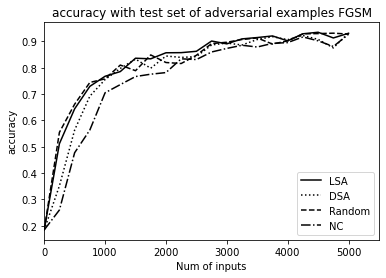

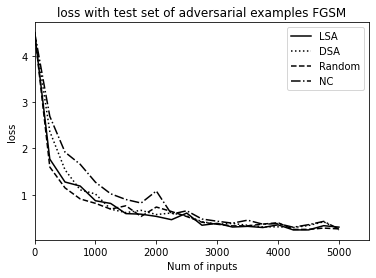

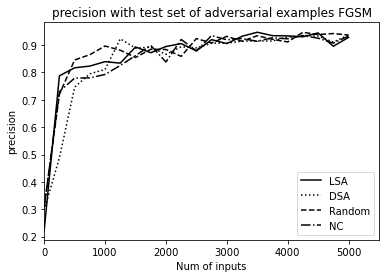

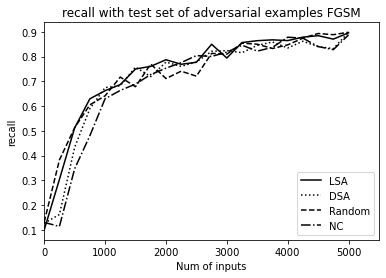

In [38]:
#configuration 3

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#metric = "accuracy" # accuracy loss
my_metrics =["accuracy","loss","precision","recall"]

for metric in my_metrics:
    plt.clf()
    plt.plot(n_inputs,df_evaluate_lsa_0[metric],colors[0],linestyle=linestyles[0])
    plt.plot(n_inputs,df_evaluate_dsa_0[metric],colors[1],linestyle=linestyles[1])
    plt.plot(n_inputs,df_evaluate_random_0[metric],colors[2],linestyle=linestyles[2])
    plt.plot(n_inputs,df_evaluate_nc_0[metric],colors[3],linestyle=linestyles[3])


    legend_elements = [Line2D([0], [0], color='k', label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color='k', label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color='k', label='Random',ls = linestyles[2]),
                   Line2D([0], [0], color='k', label='NC',ls = linestyles[3])]



    plt.legend(handles=legend_elements)#
    plt.title(metric + " with test set of adversarial examples FGSM")
    plt.xlim([0, 5500])
    #plt.ylim([0, 1])
    plt.xlabel('Num of inputs')
    plt.ylabel(metric)
    plt.savefig("gtsrb_c3_"+metric + "_0.svg")
    plt.show()

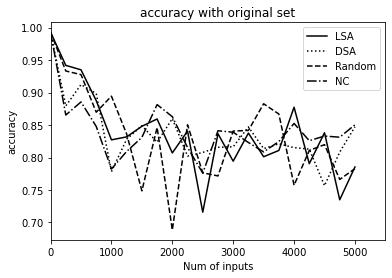

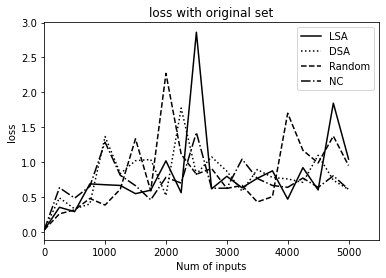

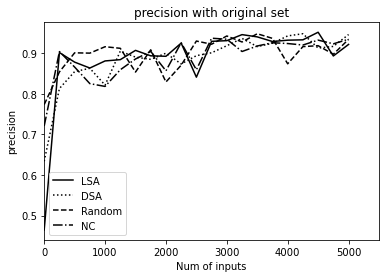

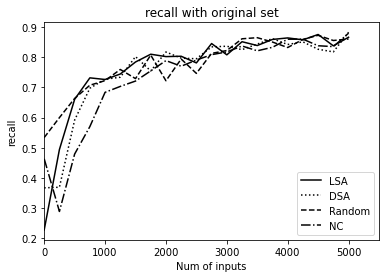

In [39]:
#configuration 3

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

my_metrics =["accuracy","loss","precision","recall"]

for metric in my_metrics:
    
#metric = "accuracy" # accuracy loss
    plt.clf()
    plt.plot(n_inputs,df_evaluate_lsa_1[metric],colors[0],linestyle=linestyles[0])
    plt.plot(n_inputs,df_evaluate_dsa_1[metric],colors[1],linestyle=linestyles[1])
    plt.plot(n_inputs,df_evaluate_random_1[metric],colors[2],linestyle=linestyles[2])
    plt.plot(n_inputs,df_evaluate_nc_1[metric],colors[3],linestyle=linestyles[3])


    legend_elements = [Line2D([0], [0], color='k', label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color='k', label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color='k', label='Random',ls = linestyles[2]),
                   Line2D([0], [0], color='k', label='NC',ls = linestyles[3])]



    plt.legend(handles=legend_elements)#
    plt.title(metric + " with original set")
    plt.xlim([0, 5500])
    #plt.ylim([0, 1])
    plt.xlabel('Num of inputs')
    plt.ylabel(metric)
    plt.savefig("gtsrb_c3_"+metric + "_1.svg")
    plt.show()

4000 0.8898801803588867
5000 0.8896252810955048
3500 0.8980372250080109
5000 0.8888605833053589


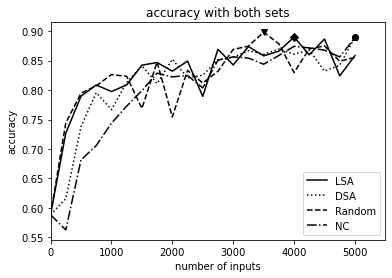

In [40]:
#adversarial jsma test set
#configuration 3
"""
6) Incremental guided retraining starting from the original model using only the new adversarial inputs.
Incremental training, starting with the previous trained model. Using at each iteration a subset of the new inputs.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



plt.plot(n_inputs,accuracy_c3_lsa_3,colors[0],linestyle=linestyles[0])
plt.plot(n_inputs,accuracy_c3_dsa_3,colors[1],linestyle=linestyles[1])
plt.plot(n_inputs,accuracy_c3_random_3,colors[2],linestyle=linestyles[2])
plt.plot(n_inputs,accuracy_c3_nc_3,colors[3],linestyle=linestyles[3])



legend_elements = [Line2D([0], [0], color='k', label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color='k', label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color='k', label='Random',ls = linestyles[2]),
                   Line2D([0], [0], color='k', label='NC',ls = linestyles[3])]



plt.legend(handles=legend_elements)#
plt.title("accuracy with both sets")

print(n_inputs[np.argmax(accuracy_c3_lsa_3)],accuracy_c3_lsa_3.max())
print(n_inputs[np.argmax(accuracy_c3_dsa_3)],accuracy_c3_dsa_3.max())
print(n_inputs[np.argmax(accuracy_c3_random_3)],accuracy_c3_random_3.max())
print(n_inputs[np.argmax(accuracy_c3_nc_3)],accuracy_c3_nc_3.max())

plt.plot(n_inputs[np.argmax(accuracy_c3_lsa_3)],accuracy_c3_lsa_3.max(),'-kD')
plt.plot(n_inputs[np.argmax(accuracy_c3_dsa_3)],accuracy_c3_dsa_3.max(),'-ko')
plt.plot(n_inputs[np.argmax(accuracy_c3_random_3)],accuracy_c3_random_3.max(),'-kv')
plt.plot(n_inputs[np.argmax(accuracy_c3_nc_3)],accuracy_c3_nc_3.max(),'-kp')

plt.xlabel('number of inputs')
plt.ylabel('accuracy')
plt.xlim([0, 5500])
#plt.ylim([0, 1])

plt.savefig("gtsrb_c3_"+"accuracy" + "_both.svg")

plt.show()

In [ ]:
n_inputs

In [41]:
print(n_inputs[3],accuracy_c3_lsa_3[3])
print(n_inputs[3],accuracy_c3_dsa_3[3])
print(n_inputs[3],accuracy_c3_random_3[3])
print(n_inputs[3],accuracy_c3_nc_3[3])


750 0.8085649013519287
750 0.7954371869564056
750 0.8070354461669922
750 0.7058373689651489


## Saving models

In [15]:
new_model_lsa_dir  = "D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2"

i=0

for model in models_lsa:
    model.save(new_model_lsa_dir+"_"+str(i))
    i+=1

INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_0\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_1\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_2\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_3\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_4\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_5\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_6\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_lsa_e2_7\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gts

In [16]:
new_model_dsa_dir  = "D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2"

i=0
for model in models_dsa:
    model.save(new_model_dsa_dir+"_"+str(i))
    i+=1

INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_0\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_1\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_2\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_3\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_4\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_5\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_6\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_dsa_e2_7\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gts

In [17]:
new_model_random_dir  = "D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2"

i=0
for model in models_random:
    model.save(new_model_random_dir+"_"+str(i))
    i+=1

INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_0\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_1\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_2\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_3\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_4\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_5\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_6\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_random_e2_7\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/mo

In [19]:
new_model_nc_dir  = "D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2"

i=0
for model in models_nc:
    model.save(new_model_nc_dir+"_"+str(i))
    i+=1

INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_0\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_1\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_2\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_3\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_4\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_5\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_6\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model_c3_sep_nc_e2_7\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/gtsrb_models/C3/gtsrb_model